In [1]:
%pylab inline
import pandas as pd
from IPython.display import display, HTML


Populating the interactive namespace from numpy and matplotlib


In [2]:
import fastparquet
reload(fastparquet)

<module 'fastparquet' from '/home/spark/anaconda2/lib/python2.7/site-packages/fastparquet/__init__.pyc'>

In [3]:
%time train = fastparquet.ParquetFile('../input/train.parq').to_pandas()

CPU times: user 20.8 s, sys: 15.1 s, total: 35.9 s
Wall time: 35.9 s


In [5]:
train.head()

customer_id market     date  f_0       f_1       f_2       f_3       f_4  \
0  133900852745      c  5012016  1.0 -0.000018 -0.000015 -0.000017 -0.000015   
1  133900858907      o  5012016  1.0 -0.000018 -0.000018 -0.000018 -0.000018   
2  133900922919      a  5012016  1.0 -0.000018 -0.000016 -0.000018 -0.000016   
3  133901138589      b  5012016  1.0 -0.000018  0.000005 -0.000018  0.000005   
4  133901138589      w  5012016  1.0 -0.000018  0.000008 -0.000018  0.000008   

        f_5       f_6  ...    f_33      f_34      f_35      f_36      f_37  \
0 -0.000018 -0.000015  ...      10 -0.000018 -0.000014 -0.000010  0.000006   
1 -0.000018 -0.000018  ...       0 -0.000018 -0.000018 -0.000018 -0.000013   
2 -0.000018 -0.000007  ...       2 -0.000018 -0.000018 -0.000018 -0.000016   
3 -0.000018  0.000008  ...      10 -0.000018  0.000003  0.000030  0.000068   
4 -0.000018  0.000018  ...       0 -0.000018 -0.000018 -0.000018 -0.000015   

       f_38      f_39  f_40  f_41 target  
0  0.000034 -0.000018     o   234      1  
1 -0.000012 -0.000018     i   891      1  
2 -0.000016 -0.000018     o   774      1  
3  0.000083 -0.000018     o   850      4  
4 -0.000015 -0.000018     o   850      5  

[5 rows x 46 columns]

In [9]:
train.shape

(21938149, 46)

In [6]:
train.customer_id.value_counts().head()

170304396506    134
135255082713    124
174203280833    111
148237566799    108
139111513590    108
Name: customer_id, dtype: int64

In [10]:
len(set(train['customer_id']))

2570488

In [11]:
train[train['customer_id']==133901138589]

customer_id market      date  f_0       f_1       f_2       f_3  \
3         133901138589      b   5012016  1.0 -0.000018  0.000005 -0.000018   
4         133901138589      w   5012016  1.0 -0.000018  0.000008 -0.000018   
2964534   133901138589      b   8012016  1.0 -0.000018  0.000006 -0.000018   
2964535   133901138589      w   8012016  1.0 -0.000018  0.000008 -0.000018   
5194777   133901138589      b   9012016  1.0 -0.000018  0.000005 -0.000018   
5194778   133901138589      w   9012016  1.0 -0.000018  0.000008 -0.000018   
8900156   133901138589      b  11012016  1.0 -0.000018  0.000009 -0.000017   
11110978  133901138589      b  12012016  1.0 -0.000018  0.000011 -0.000017   
13312183  133901138589      b   1012017  1.0 -0.000018  0.000011 -0.000017   
15499772  133901138589      b   2012017  1.0 -0.000018  0.000018 -0.000017   
17668615  133901138589      b   3012017  1.0 -0.000018  0.000019 -0.000018   
19815323  133901138589      b   4012017  1.0 -0.000018  0.000010 -0.000018   

               f_4       f_5       f_6  ...    f_33      f_34      f_35  \
3         0.000005 -0.000018  0.000008  ...      10 -0.000018  0.000003   
4         0.000008 -0.000018  0.000018  ...       0 -0.000018 -0.000018   
2964534   0.000005 -0.000018  0.000009  ...      10 -0.000018  0.000005   
2964535   0.000008 -0.000018  0.000018  ...       0 -0.000018 -0.000018   
5194777   0.000004 -0.000018  0.000006  ...      10 -0.000018  0.000006   
5194778   0.000008 -0.000018  0.000018  ...       0 -0.000018 -0.000018   
8900156   0.000009 -0.000018  0.000014  ...      10 -0.000018  0.000005   
11110978  0.000010 -0.000018  0.000019  ...      10 -0.000018 -0.000001   
13312183  0.000010 -0.000018  0.000019  ...      10 -0.000018 -0.000001   
15499772  0.000017 -0.000018  0.000010  ...      10 -0.000018 -0.000004   
17668615  0.000019 -0.000018  0.000018  ...      11 -0.000018 -0.000008   
19815323  0.000010 -0.000018  0.000018  ...      11 -0.000018 -0.000010   

              f_36      f_37      f_38      f_39  f_40  f_41 target  
3         0.000030  0.000068  0.000083 -0.000018     o   850      4  
4        -0.000018 -0.000015 -0.000015 -0.000018     o   850      5  
2964534   0.000035  0.000073  0.000100 -0.000018     o   850      4  
2964535  -0.000018 -0.000015 -0.000015 -0.000018     o   850      5  
5194777   0.000044  0.000091  0.000125 -0.000018     o   850      4  
5194778  -0.000018 -0.000015 -0.000015 -0.000018     o   850      5  
8900156   0.000045  0.000109  0.000154 -0.000018     o   850      4  
11110978  0.000037  0.000109  0.000163 -0.000018     o   850      4  
13312183  0.000037  0.000109  0.000163 -0.000018     o   850      4  
15499772  0.000023  0.000087  0.000168 -0.000018     o   850      4  
17668615  0.000016  0.000065  0.000165 -0.000018     o   850      7  
19815323  0.000004  0.000042  0.000155 -0.000018     o   850     10  

[12 rows x 46 columns]

In [16]:
train['date'].value_counts().sort_index()

1012017     2187589
2012017     2168841
3012017     2146708
4012017     2122833
5012016     2220431
7012016      744099
8012016     2230243
9012016     2225071
10012016    1480306
11012016    2210823
12012016    2201205
Name: date, dtype: int64

In [4]:
vc=train['customer_id'].value_counts()

In [6]:
train.shape[0]/float(len(vc))

8.53462416475004

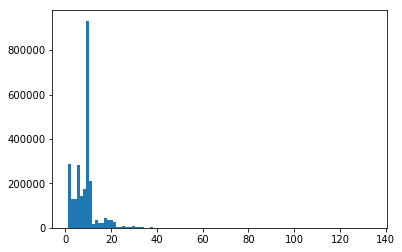

In [10]:
plt.hist(vc.values,bins=100);

In [11]:
vc=train[['customer_id','market','date']].groupby(['customer_id','market']).count()

In [12]:
train.shape[0]/float(len(vc))

7.29390292638521

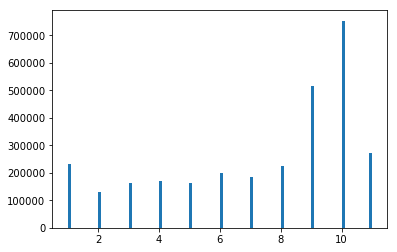

In [13]:
plt.hist(vc.values,bins=100);

In [15]:
train['market'].value_counts()

a    4141131
q    2035628
e    1166032
r    1146630
h     963990
c     945813
f     942082
s     901856
d     896000
k     849637
t     830350
x     774722
j     724953
b     696128
w     685247
g     608601
m     549916
n     524843
l     516044
p     497454
i     490851
v     380295
o     347964
u     321982
Name: market, dtype: int64

In [34]:
train['target'].value_counts().sort_index() 

0      466073
1     5516217
2     3638695
3     2531371
4     1825036
5     2380847
6     1441715
7     1608150
8      842854
9      812691
10     359110
11     183079
12     189472
13      94142
14      42898
15       2481
16       1786
17        858
18        553
20        121
Name: target, dtype: int64

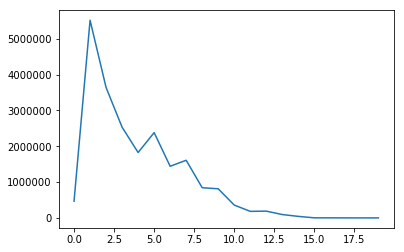

In [37]:
plt.plot(range(20),(train['target'].value_counts().sort_index().values))

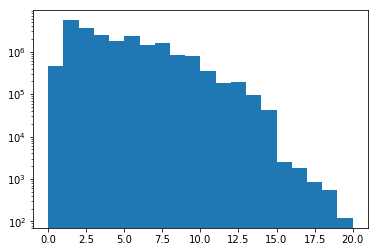

In [23]:
plt.hist(train['target'].values,bins=20,log=True);

In [16]:
vc=train[[ 'market','target']].groupby([ 'market']).mean()

In [38]:
vc.T

market         a        b         c         d        e         f         g  \
target  3.532056  3.38068  3.397906  3.831468  4.11373  3.599124  3.528607   

market         h        i         j    ...            o         p         q  \
target  3.241651  3.65798  3.409593    ...     4.450314  4.312646  4.636055   

market         r         s         t         u         v         w         x  
target  3.485725  3.989629  3.474933  3.533247  4.089241  4.191529  3.951228  

[1 rows x 24 columns]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x']
a


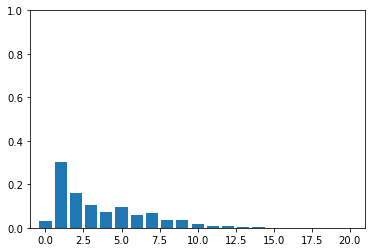

b


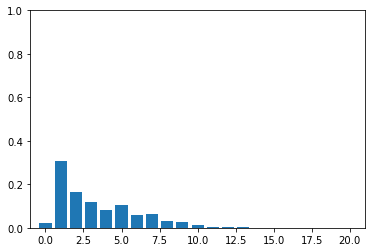

c


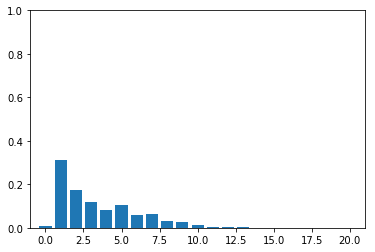

d


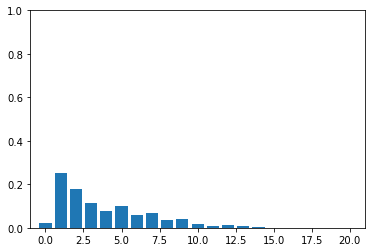

e


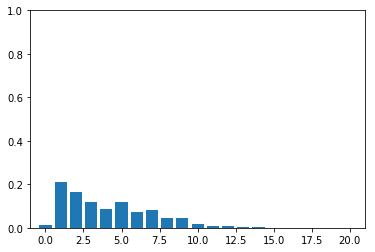

f


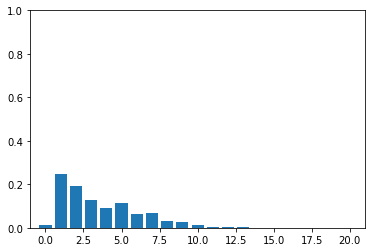

g


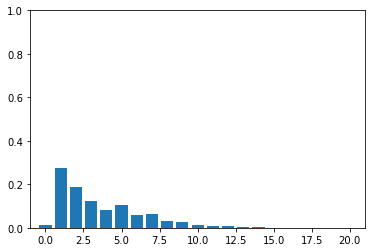

h


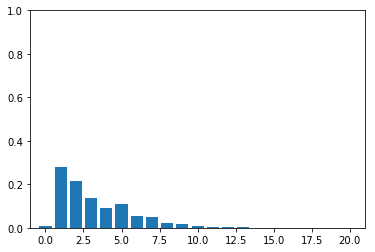

i


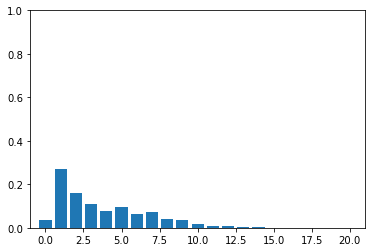

j


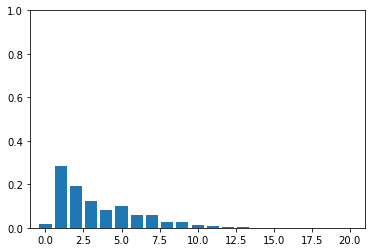

k


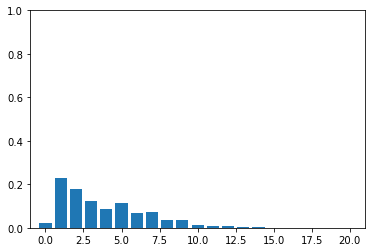

l


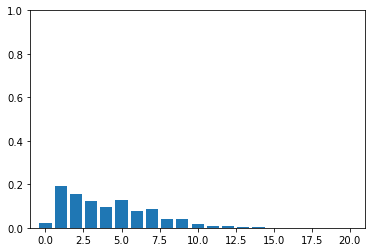

m


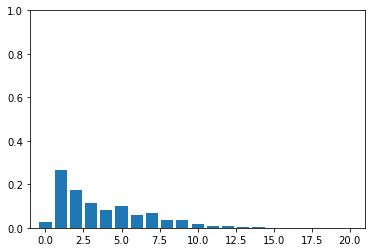

n


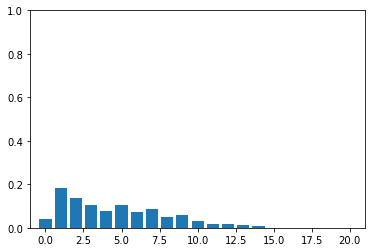

o


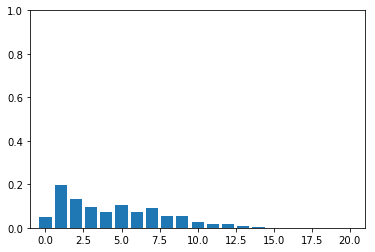

p


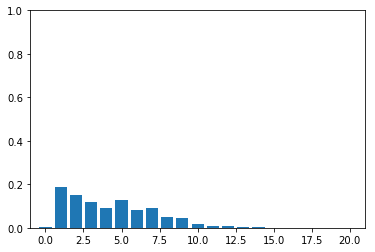

q


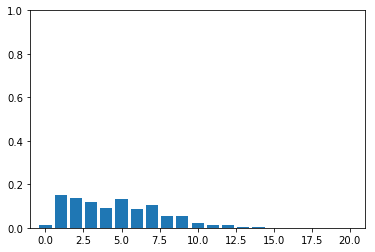

r


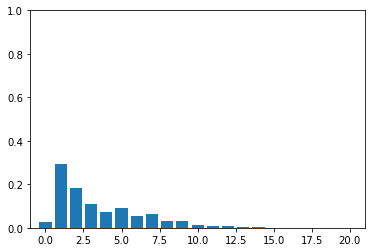

s


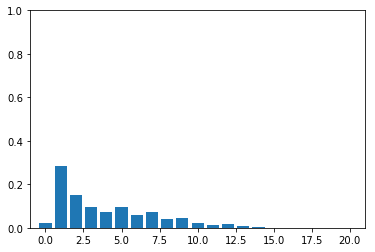

t


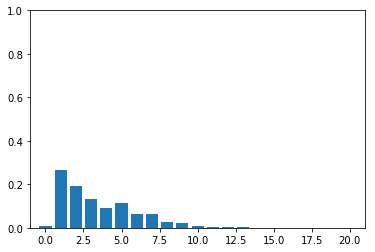

u


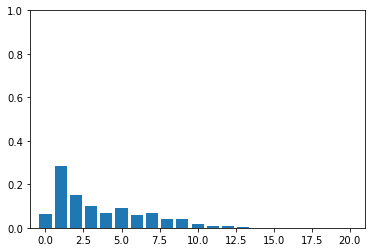

v


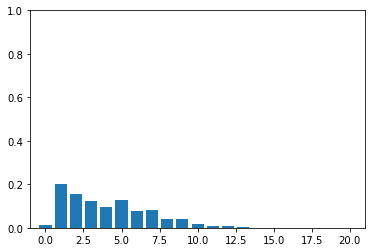

w


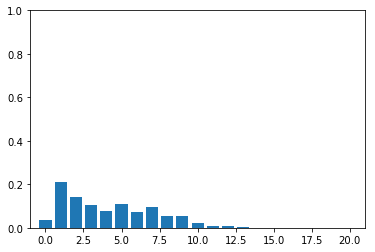

x


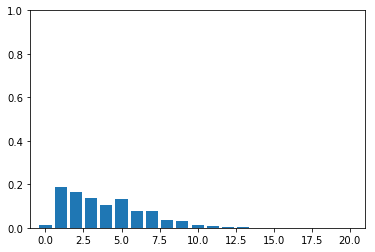

In [436]:
col='market'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[0, 1, 2]
0


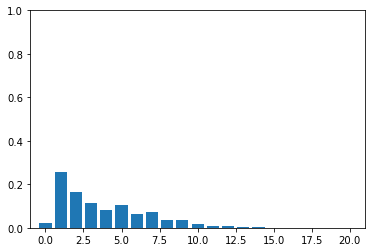

1


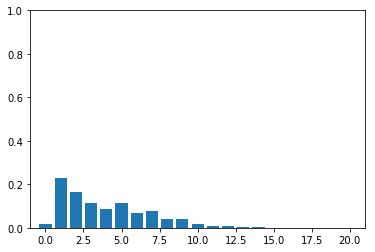

2


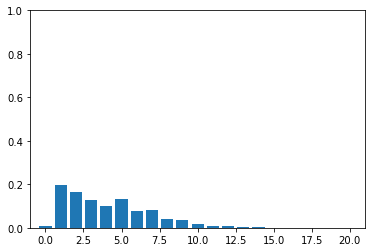

In [435]:
col='f_18'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
0


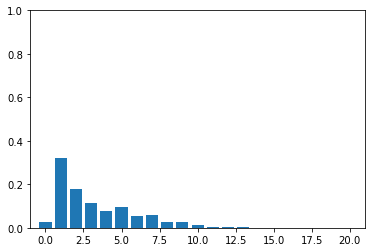

1


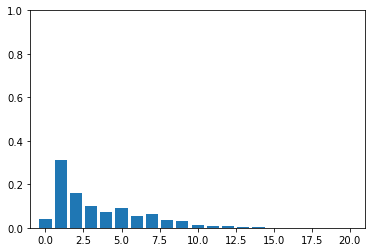

2


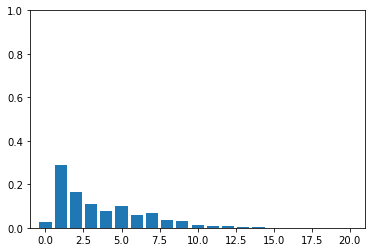

3


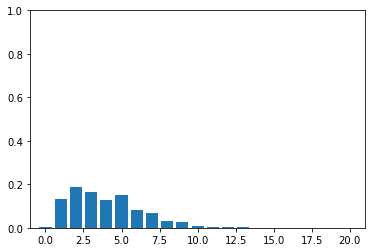

4


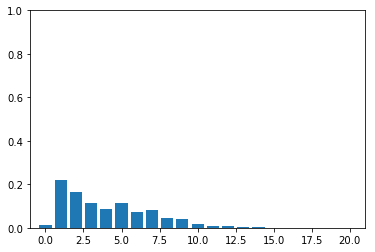

5


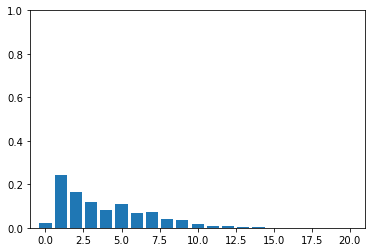

6


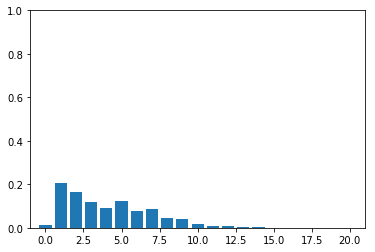

7


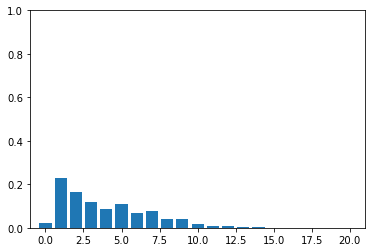

8


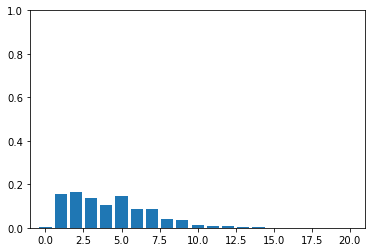

9


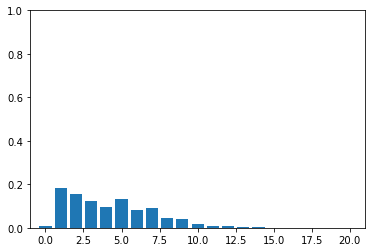

10


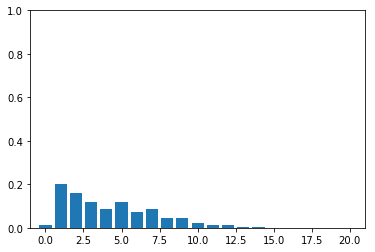

11


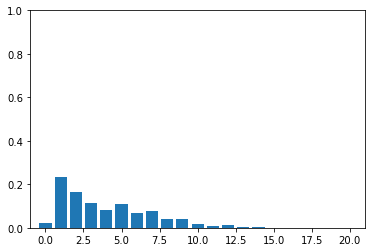

12


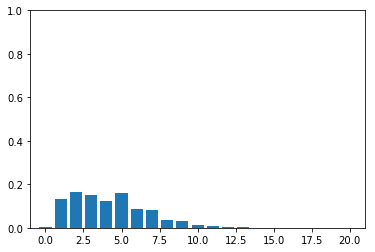

13


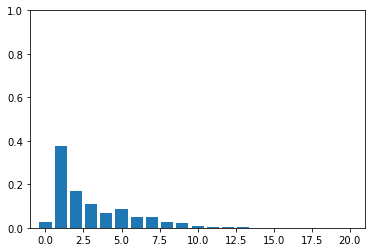

In [434]:
col='f_33'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
0


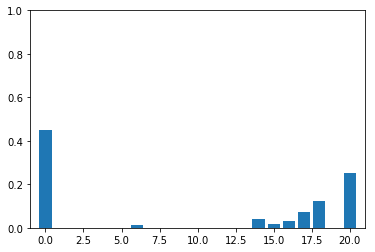

1


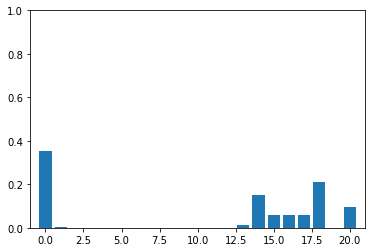

2


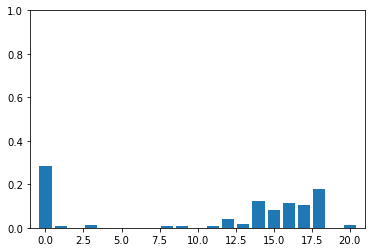

3


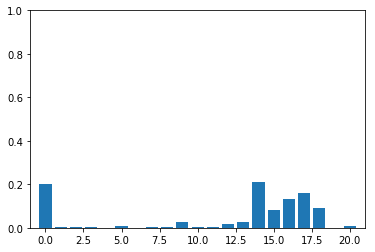

4


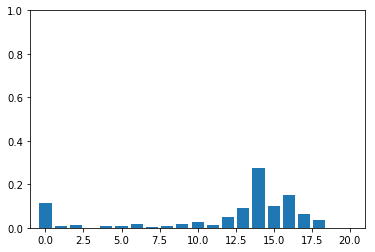

5


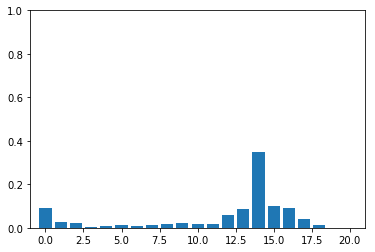

6


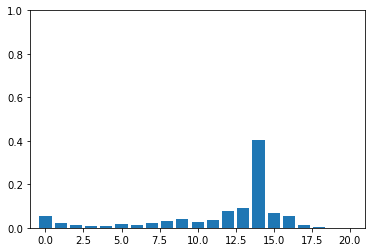

7


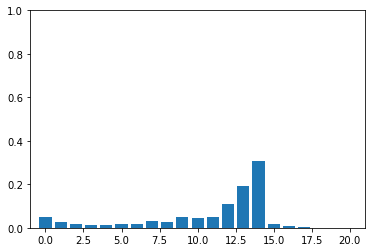

8


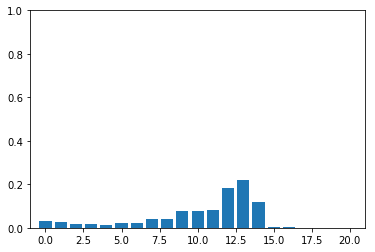

9


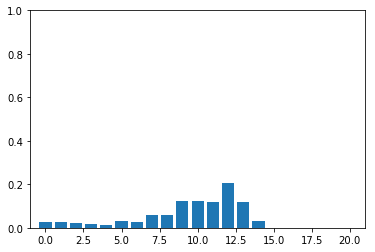

10


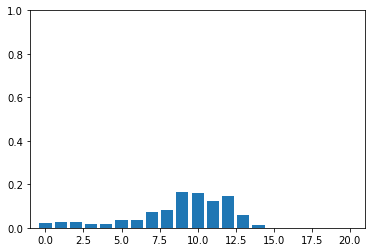

11


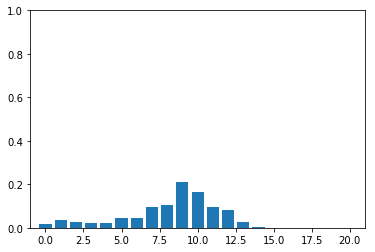

12


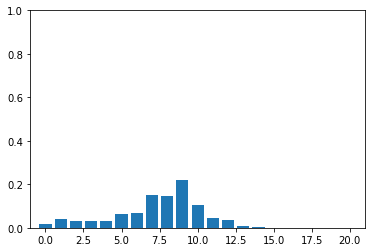

13


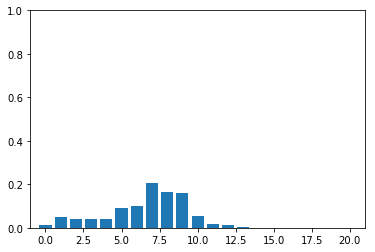

14


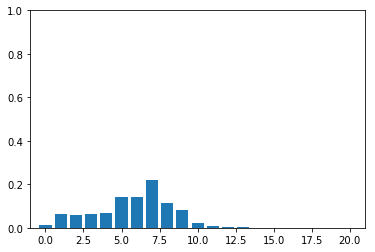

15


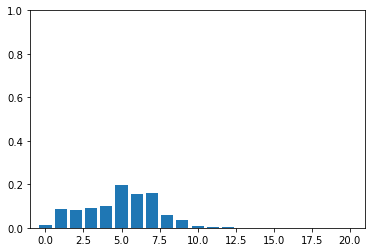

16


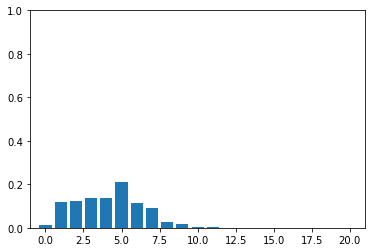

17


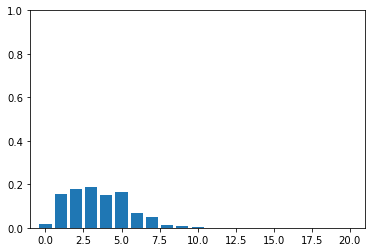

18


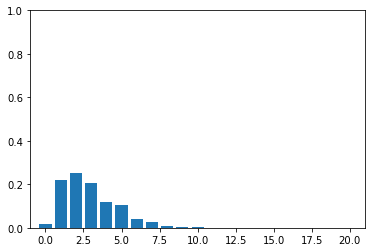

19


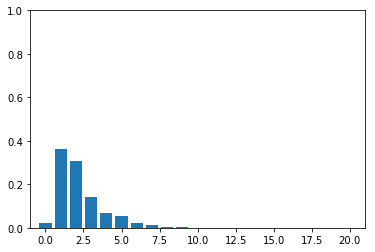

20


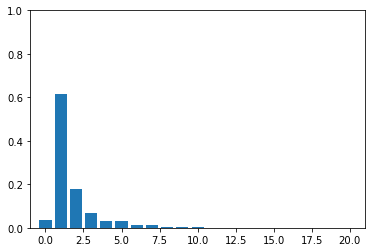

In [433]:
col='f_28'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

In [47]:
for col in train.columns:
    if col.startswith('f_') and col!='f_41':
        if df[col].dtype=='object':
            print col

f_16
f_17
f_19
f_21
f_22
f_23
f_24
f_25
f_26
f_40


['a', 'b', 'c', 'd', 'e']
a


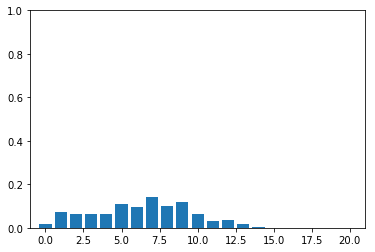

b


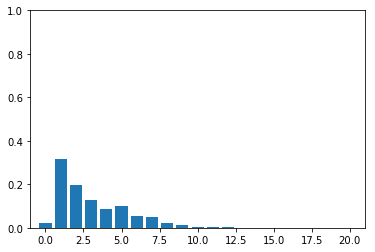

c


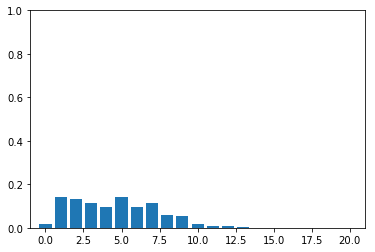

d


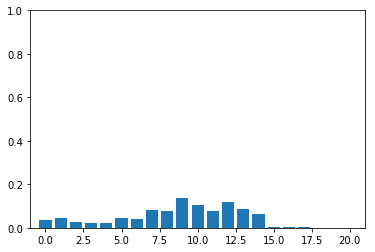

e


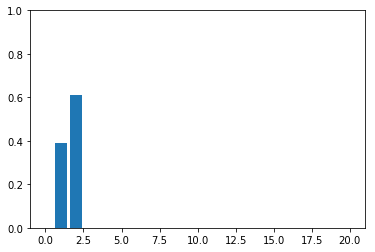

In [432]:
col='f_16'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['a', 'b', 'c', 'd', 'e']
a


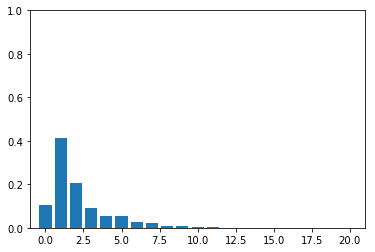

b


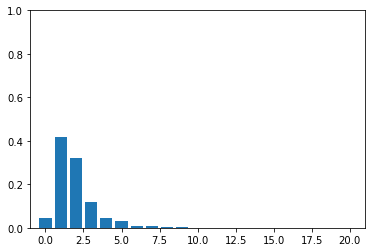

c


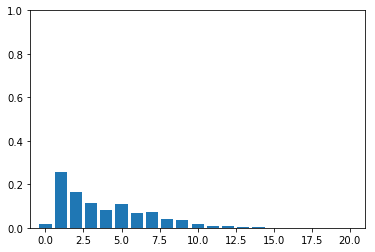

d


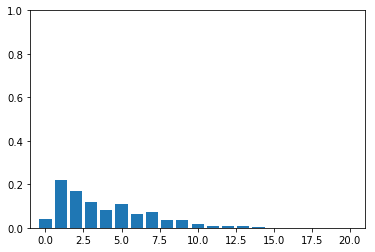

e


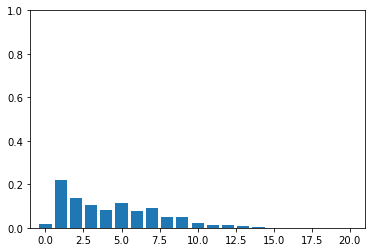

In [431]:
col='f_17'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['a', 'b', 'c', 'd']
a


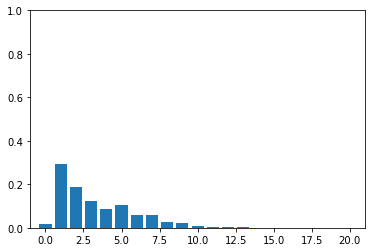

b


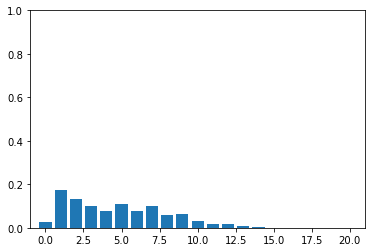

c


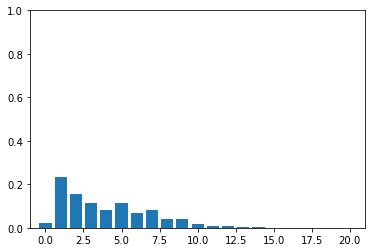

d


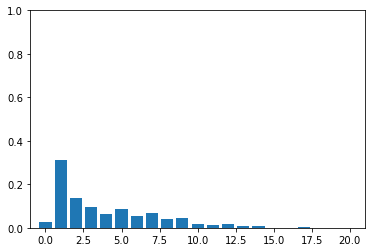

In [430]:
col='f_19'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['a', 'b', 'c', 'd', 'e']
a


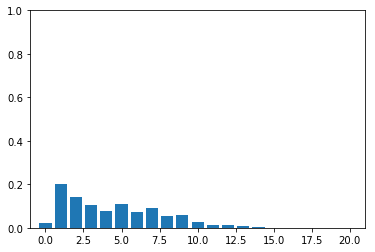

b


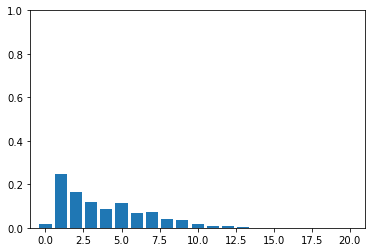

c


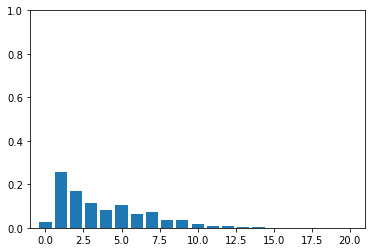

d


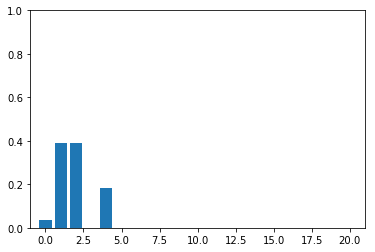

e


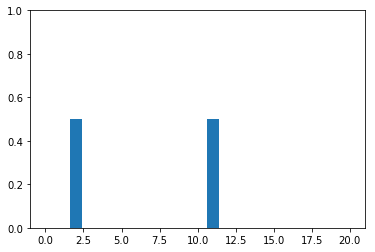

In [429]:
col='f_21'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['a', 'b', 'c', 'd', 'e']
a


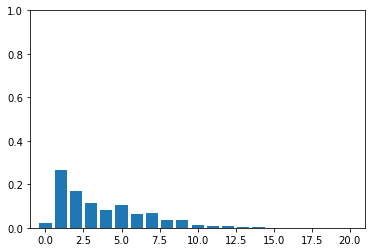

b


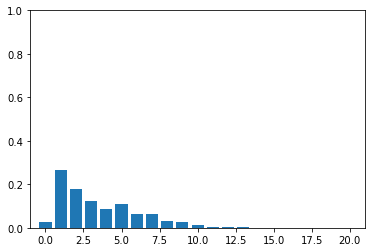

c


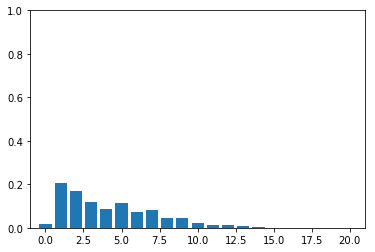

d


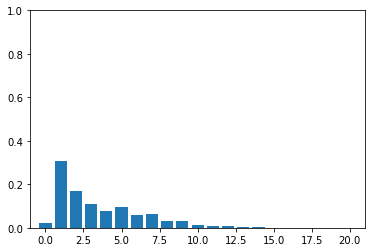

e


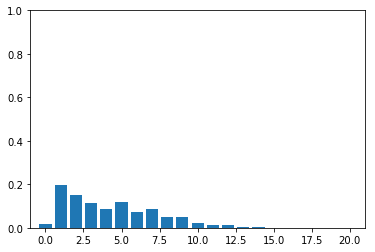

In [428]:
col='f_22'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['a', 'b', 'c', 'd', 'e']
a


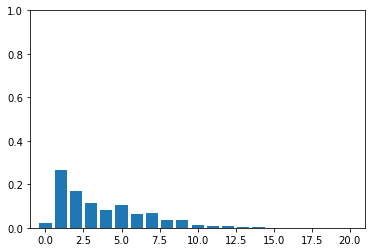

b


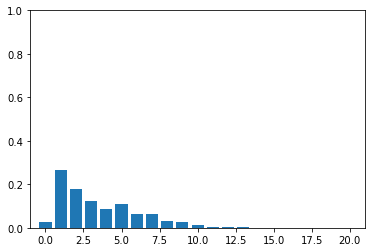

c


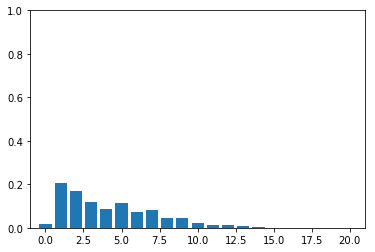

d


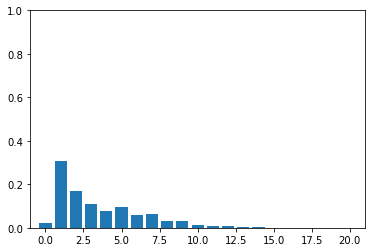

e


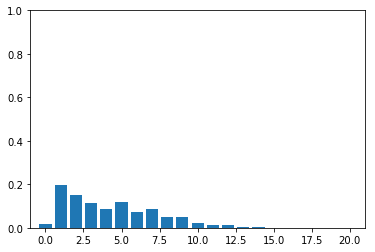

In [427]:
col='f_23'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\xc2\x80']
a


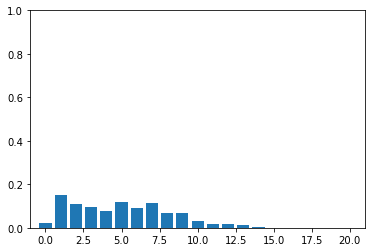

b


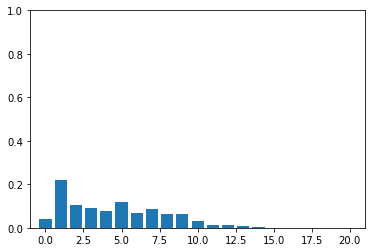

c


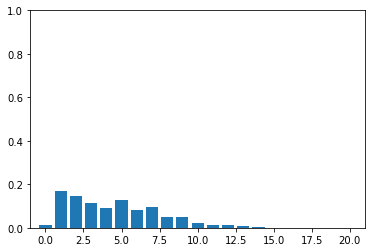

d


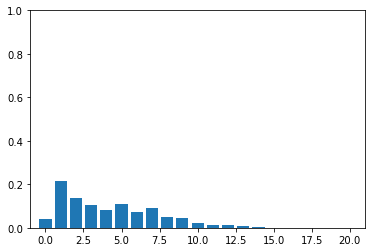

e


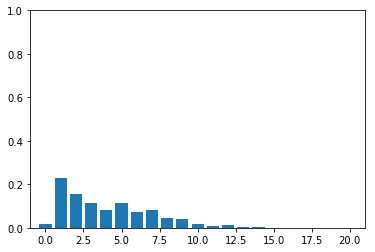

f


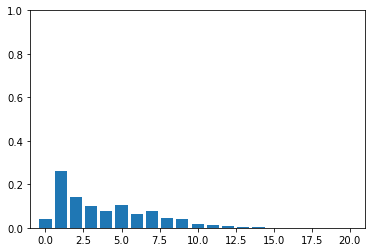

g


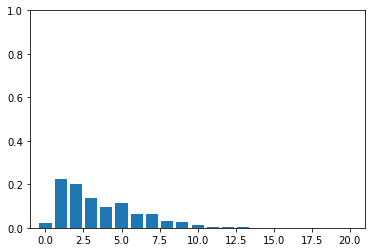

h


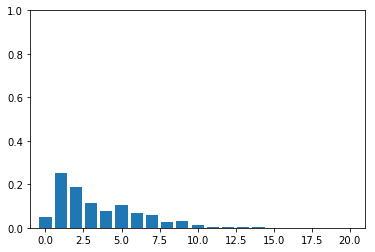

i


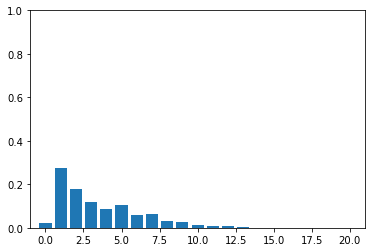

j


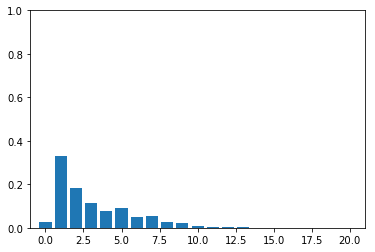

k


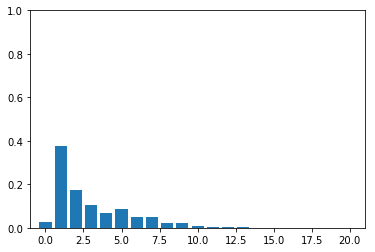

l


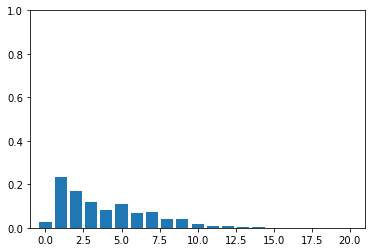

m


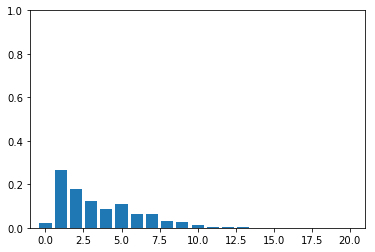

n


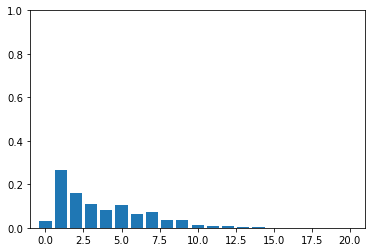

o


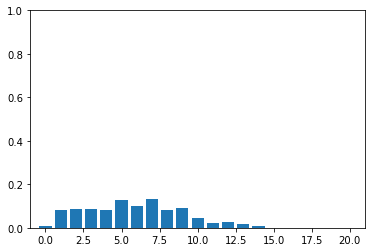

p


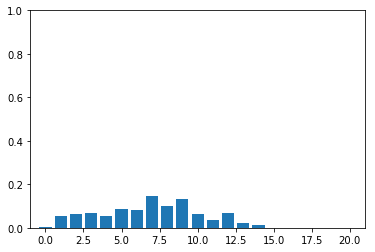

q


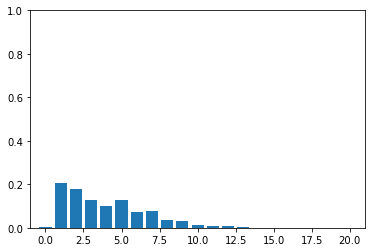

r


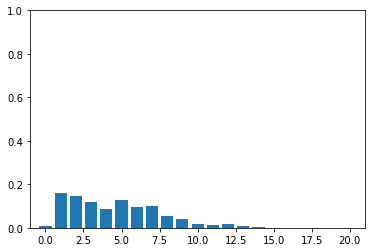

s


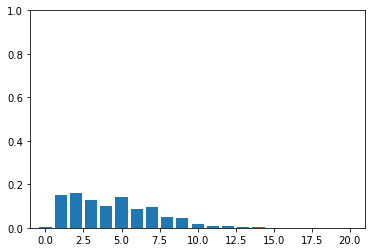

t


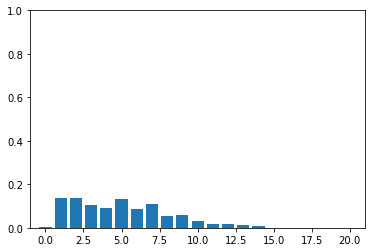

u


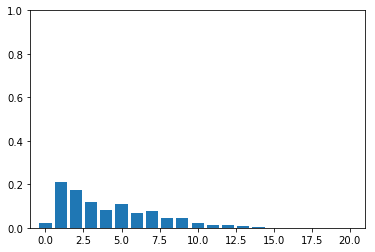

v


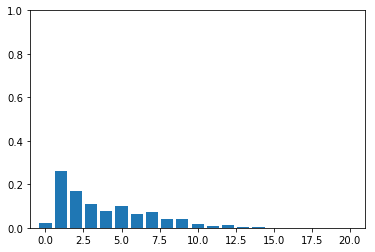

w


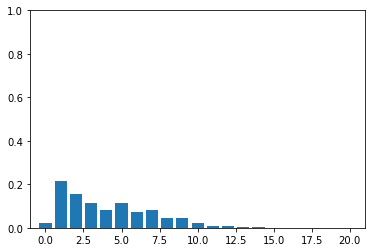

x


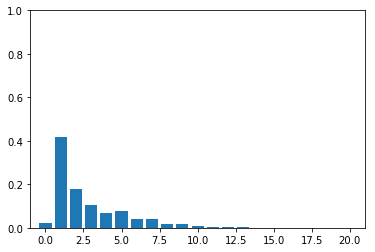

y


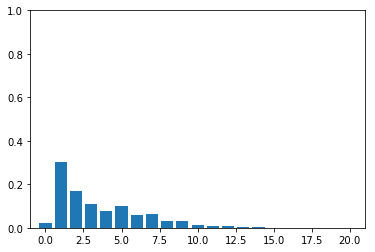

z


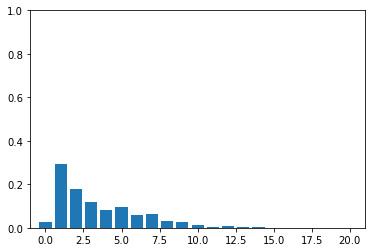

{


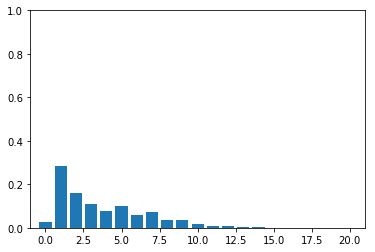

|


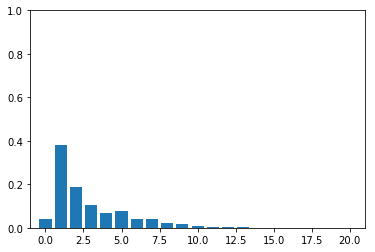

}


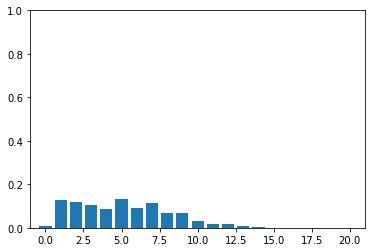

~


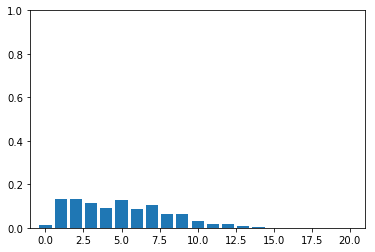




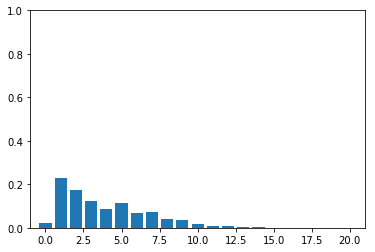




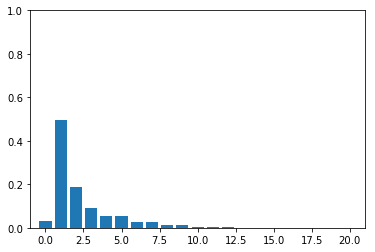

In [426]:
col='f_24'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['a', 'b']
a


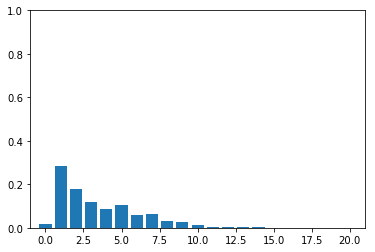

b


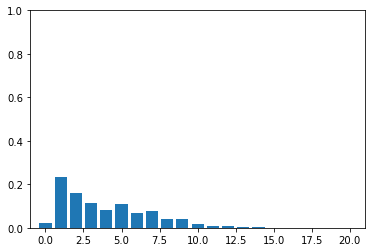

In [425]:
col='f_25'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['a', 'b']
a


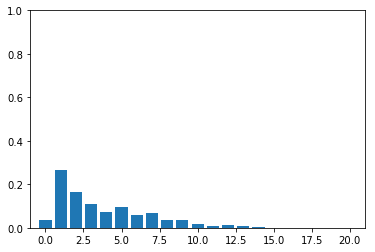

b


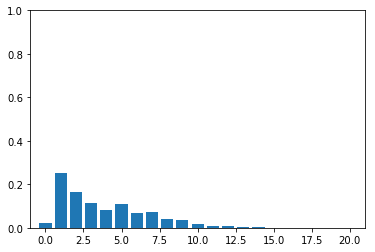

In [424]:
col='f_26'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p']
a


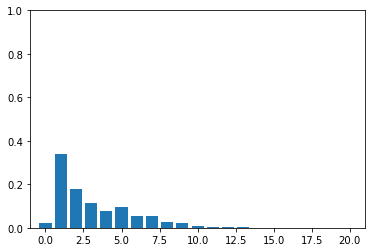

b


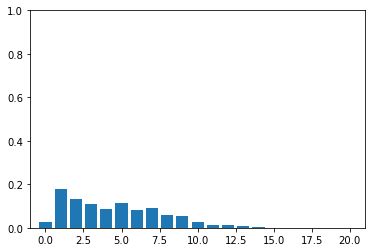

c


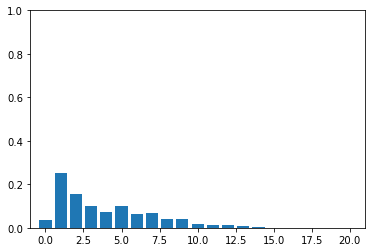

d


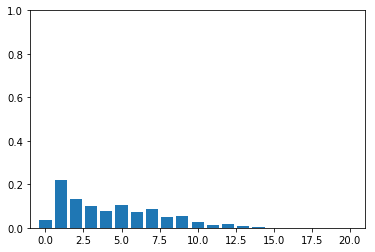

e


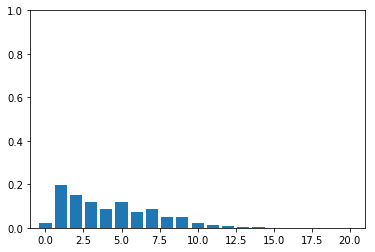

f


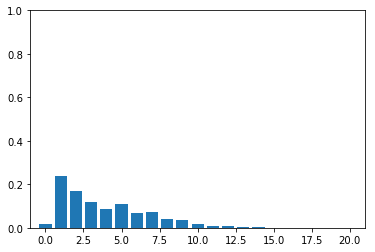

g


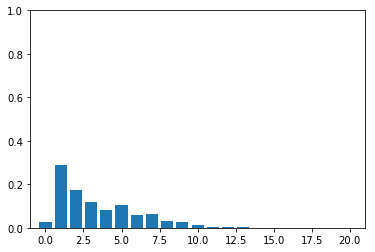

h


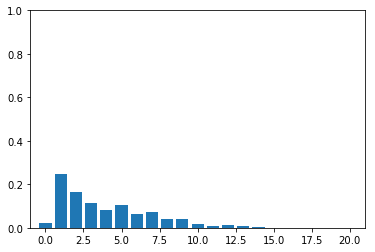

i


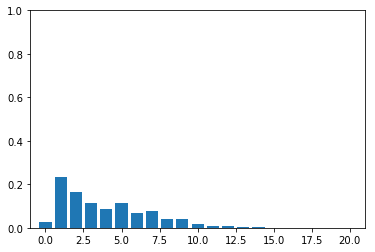

j


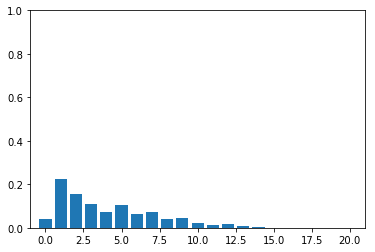

k


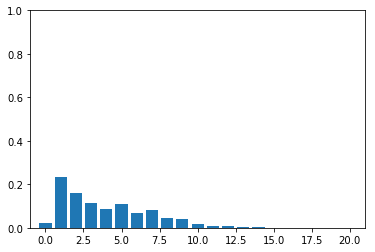

l


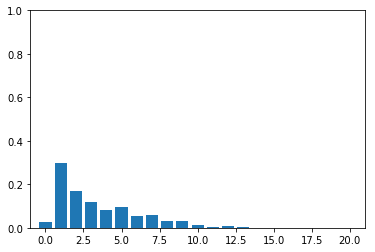

m


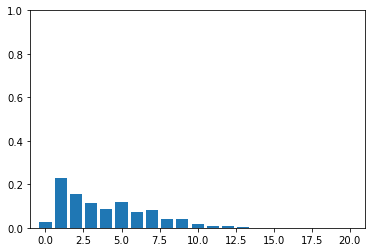

n


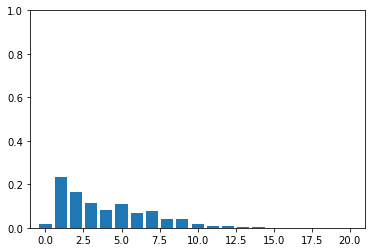

o


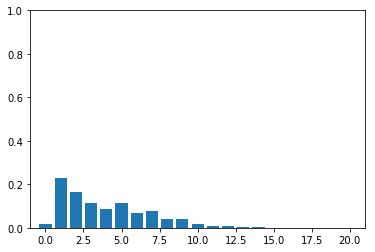

p


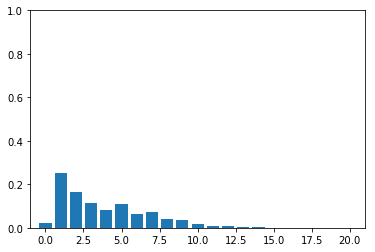

In [423]:
col='f_40'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[0.0, 0.1, 0.2, 0.30000001, 0.40000001, 0.5, 0.60000002, 0.69999999, 0.80000001, 0.89999998, 1.0]
0.0


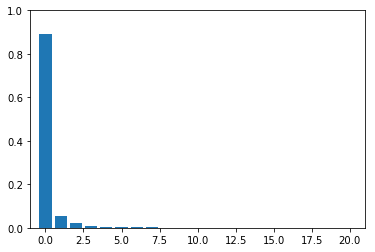

0.1


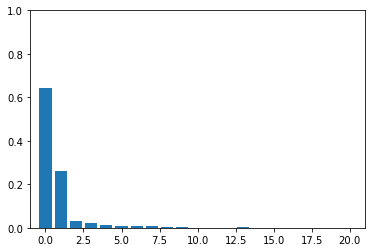

0.2


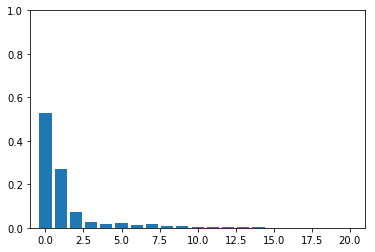

0.3


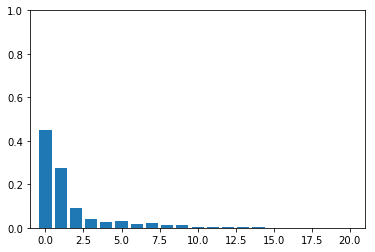

0.4


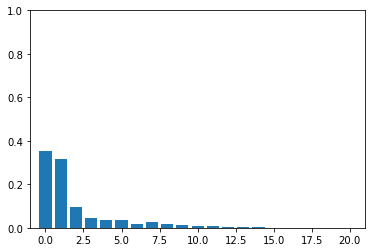

0.5


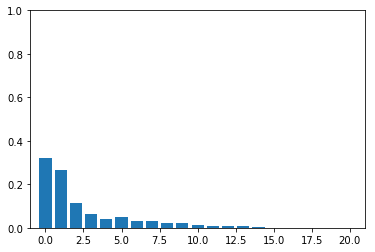

0.6


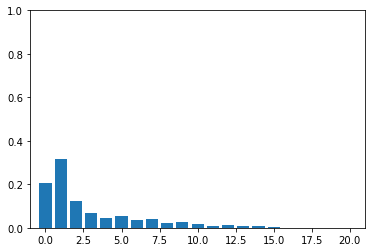

0.7


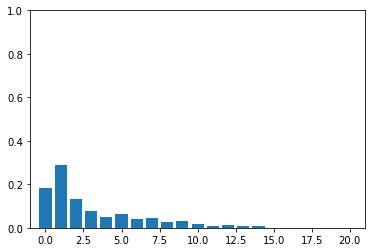

0.8


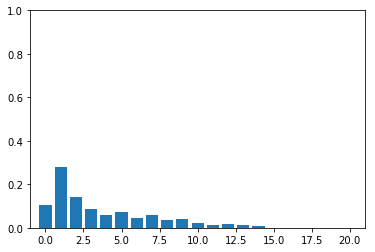

0.9


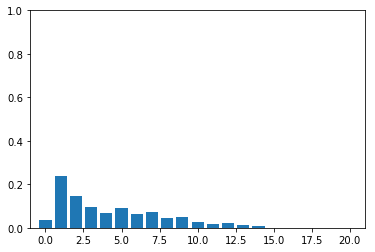

1.0


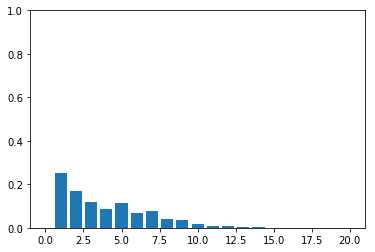

In [421]:
col='f_0'
s=np.round(train[col],1)
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]
0.0


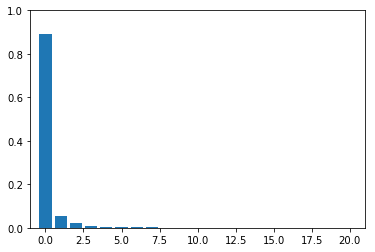

1.0


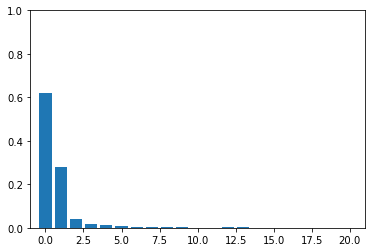

2.0


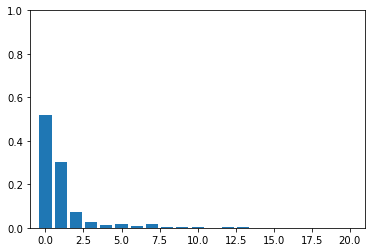

3.0


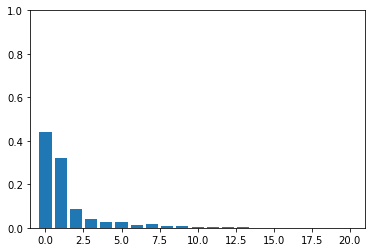

4.0


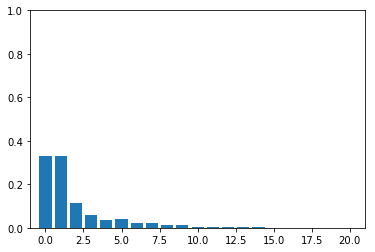

5.0


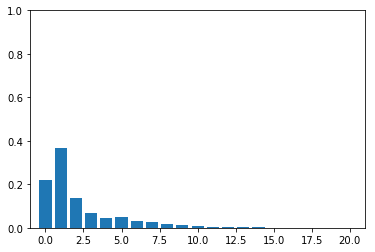

6.0


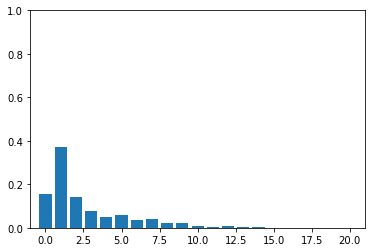

7.0


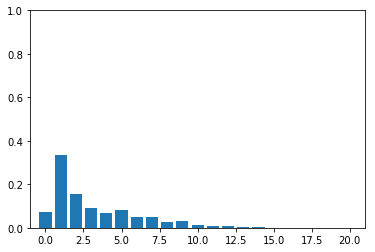

8.0


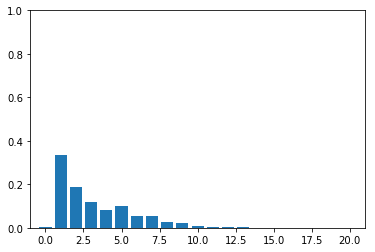

9.0


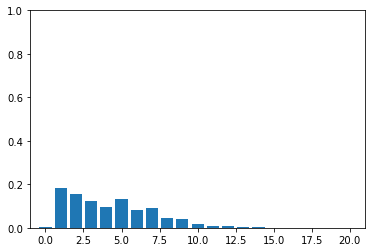

10.0


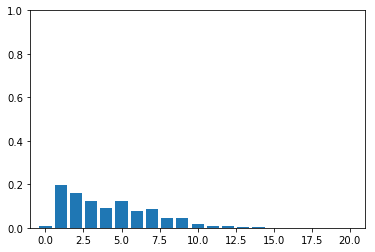

11.0


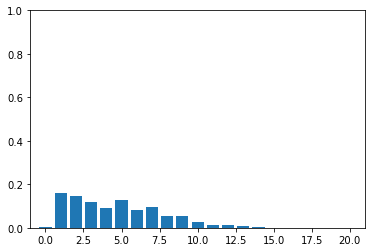

12.0


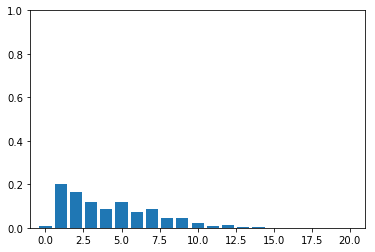

13.0


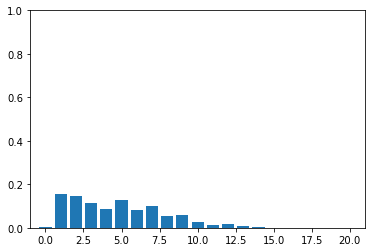

14.0


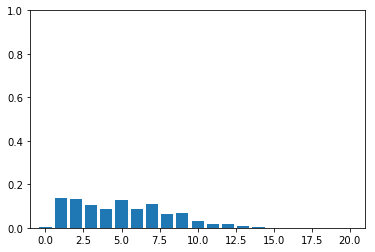

15.0


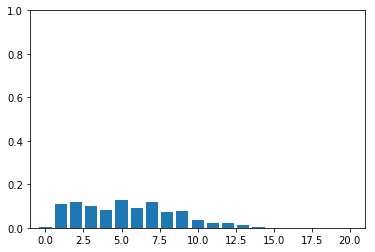

16.0


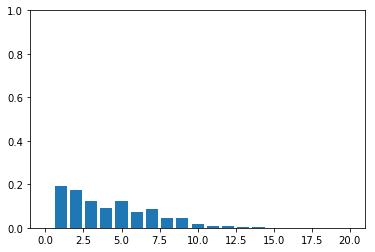

17.0


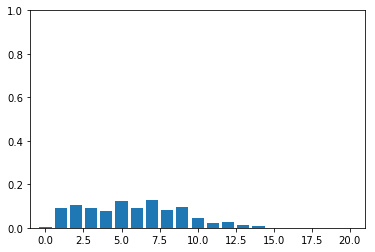

18.0


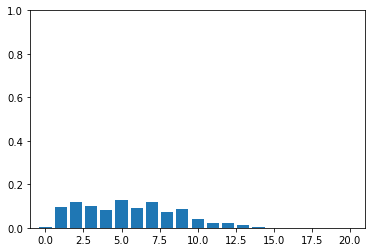

19.0


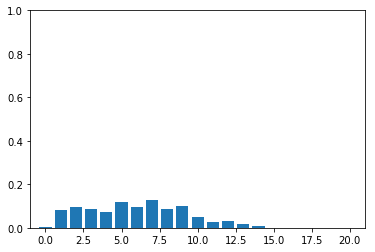

20.0


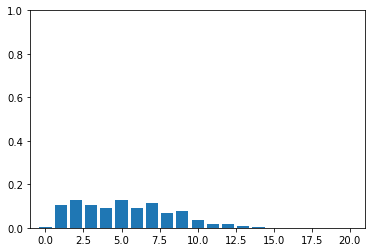

21.0


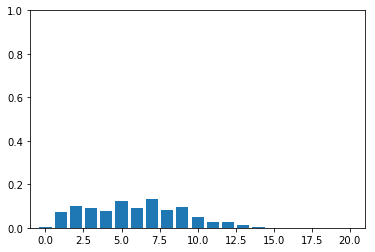

22.0


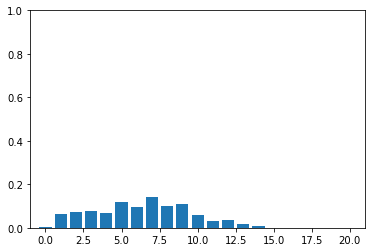

23.0


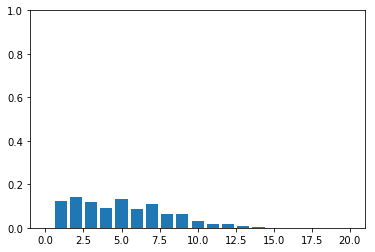

24.0


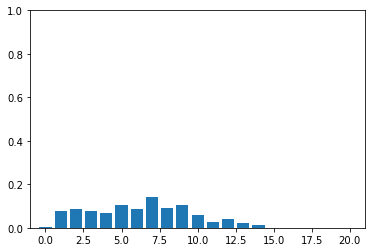

25.0


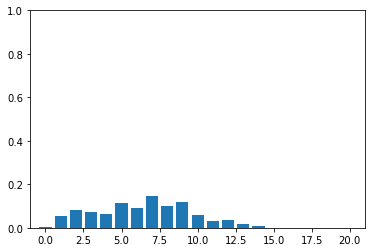

26.0


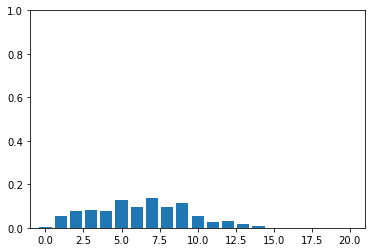

27.0


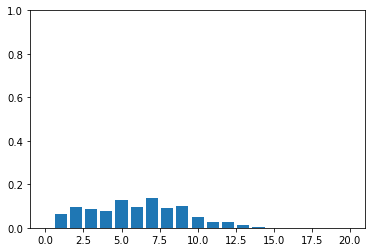

28.0


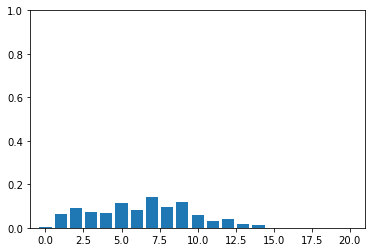

29.0


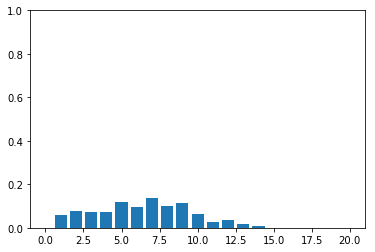

30.0


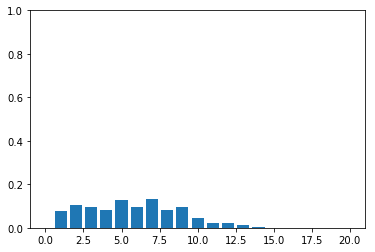

In [420]:
col='f_1'
s=train['f_1']*1e8
s=s-s.min()
s[s>30]=30
s=np.round(s,0)
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[0.0, 1.0]
0.0


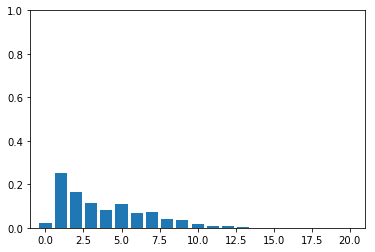

1.0


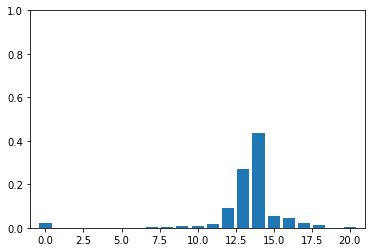

In [419]:
col='f_2'
s=train['f_2']*1e3
s=s-s.min()
s=np.round(s,0)
s[s>1]=1
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-1.0, 0.0, 1.0]
-1.0


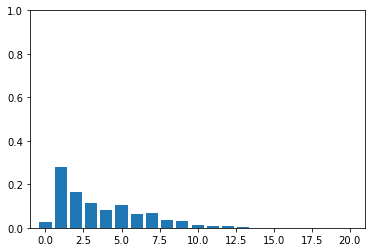

0.0


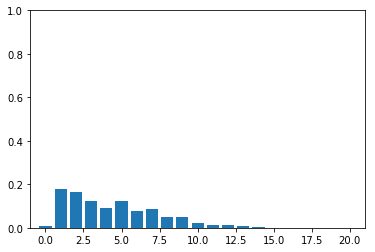

1.0


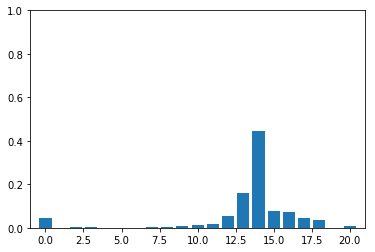

In [418]:
col='f_3'
s=train[col]*1e3
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>1]=1
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-1.0, 0.0, 1.0, 2.0]
-1.0


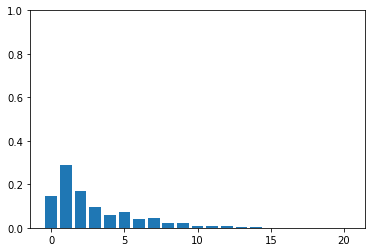

0.0


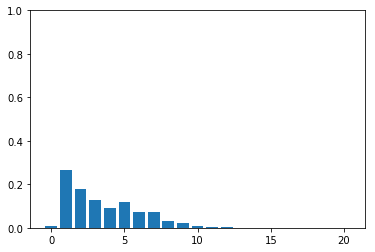

1.0


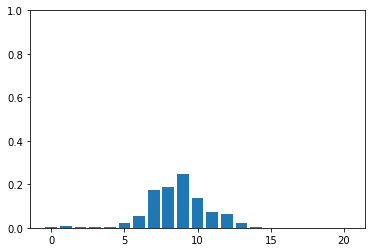

2.0


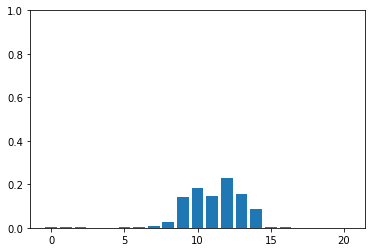

In [168]:
col='f_4'
s=train[col]*1e4
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>2]=2
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    plt.show()

[-1.0, 0.0, 1.0, 2.0]
-1.0


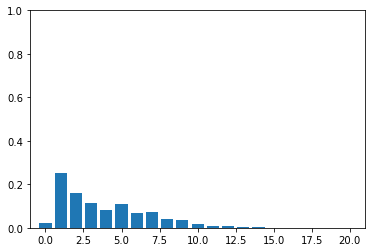

0.0


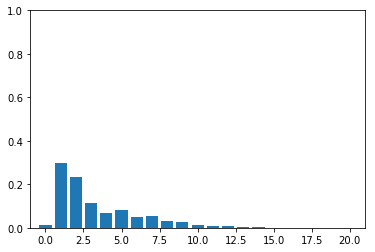

1.0


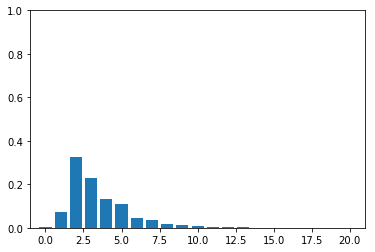

2.0


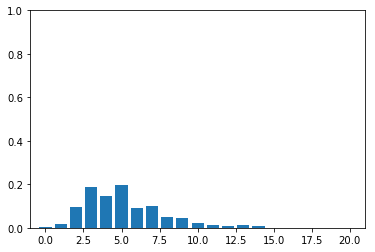

In [417]:
col='f_5'
s=train[col]*1e5
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>2]=2
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[16.0, 17.0]
16.0


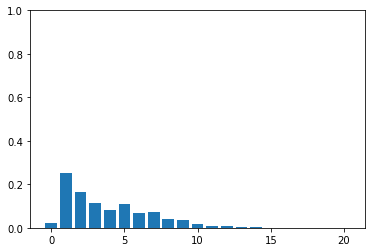

17.0


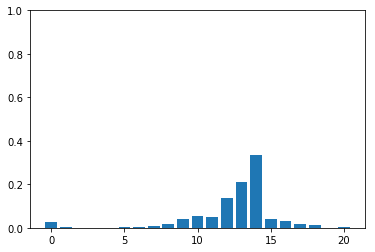

In [199]:
col='f_6'
s=train[col]*1e2
s=s-s.min()
#s[s==0]=-1
s=np.round(s,0)
#s[s>2]=2
s[s>17]=17
s[s<16]=16
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    plt.show()

[16.0, 17.0]
16.0


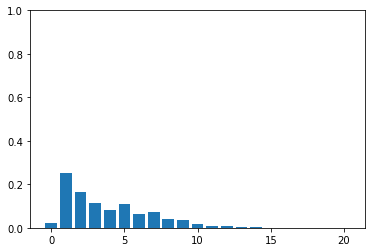

17.0


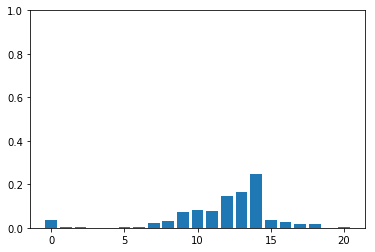

In [204]:
col='f_7'
s=train[col]*1e2
s=s-s.min()
#s[s==0]=-1
s=np.round(s,0)
#s[s>2]=2
s[s>17]=17
s[s<16]=16
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    plt.show()

[21.0, 22.0, 23.0]
21.0


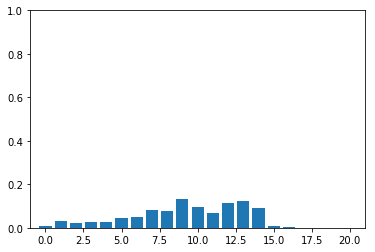

22.0


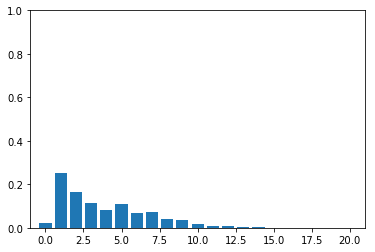

23.0


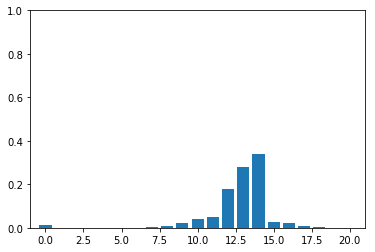

In [416]:
col='f_8'
s=train[col]*1e3
s=s-s.min()
#s[s==0]=-1
s=np.round(s,0)
s[s>23]=23
s[s<21]=21
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[8.0, 9.0, 10.0]
8.0


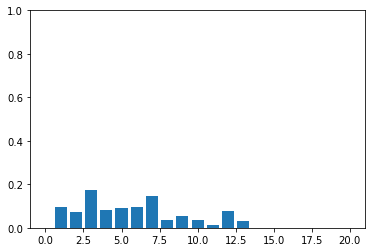

9.0


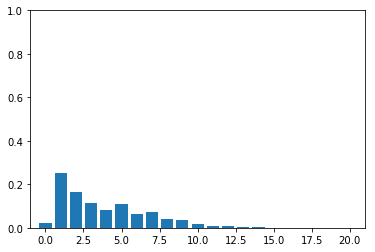

10.0


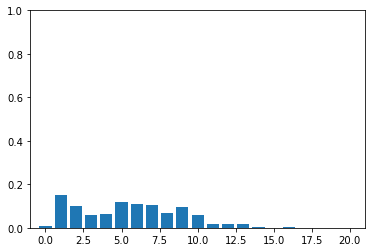

In [415]:
col='f_9'
s=train[col]*1e4
s=s-s.min()
#s[s==0]=-1
s=np.round(s,0)
s[s>10]=10
s[s<8]=8
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-1.0, 0.0, 1.0, 2.0]
-1.0


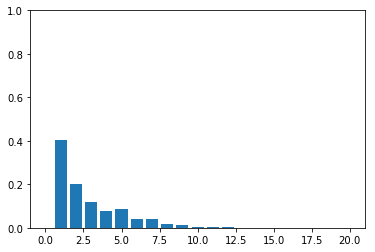

0.0


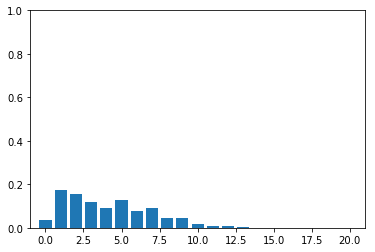

1.0


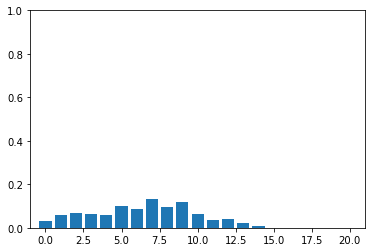

2.0


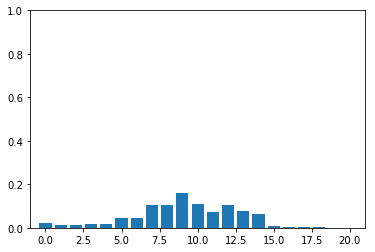

In [414]:
col='f_10'
s=train[col]*1e4
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>2]=2
# s[s<8]=8
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-1.0, 0.0, 1.0, 2.0]
-1.0


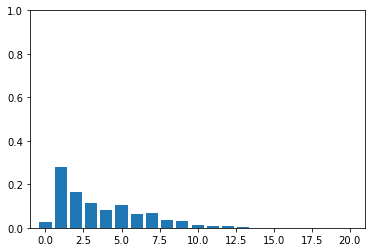

0.0


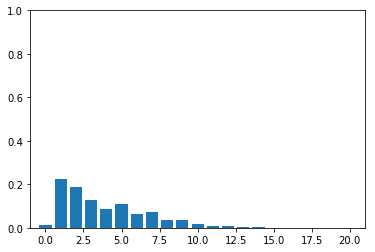

1.0


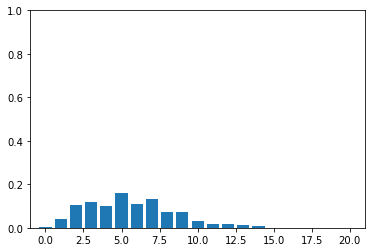

2.0


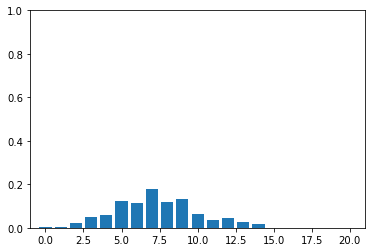

In [413]:
col='f_11'
s=train[col]*1e4
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>2]=2
# s[s<8]=8
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-1.0, 0.0, 1.0, 2.0]
-1.0


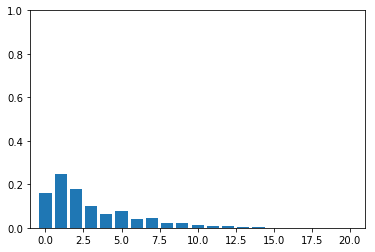

0.0


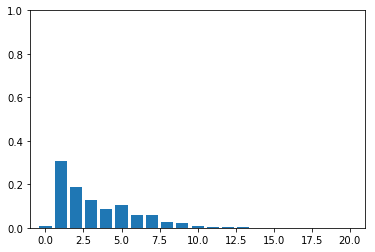

1.0


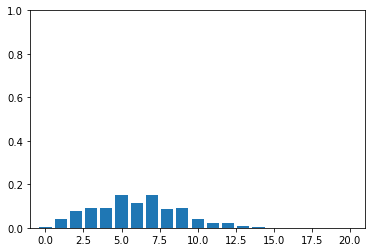

2.0


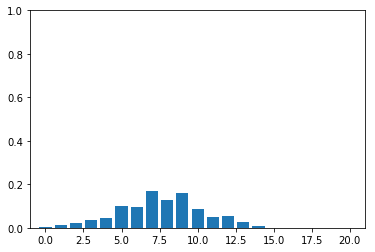

In [412]:
col='f_12'
s=train[col]*1e4
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>2]=2
# s[s<8]=8
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-1.0, 0.0, 1.0, 2.0]
-1.0


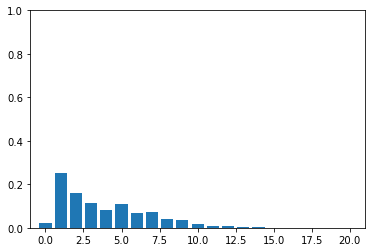

0.0


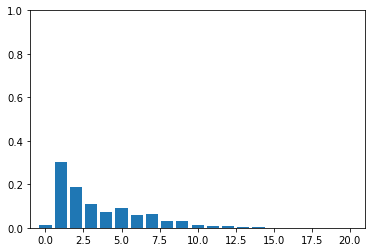

1.0


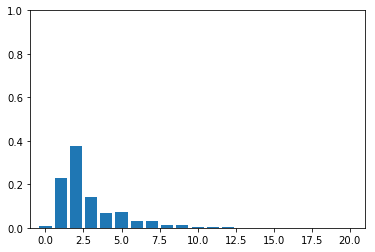

2.0


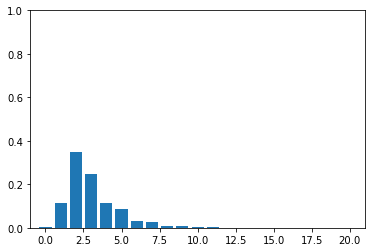

In [411]:
col='f_13'
s=train[col]*1e4
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>2]=2
# s[s<8]=8
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
-1.0


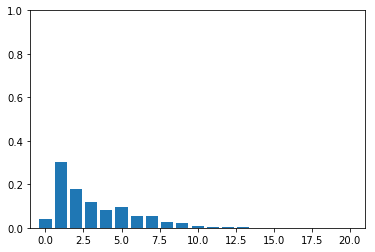

0.0


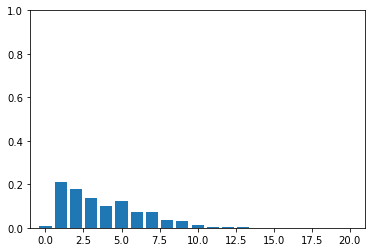

1.0


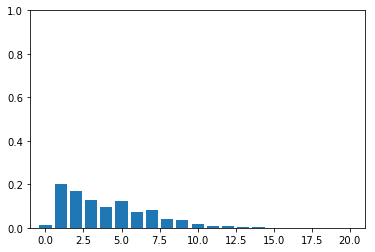

2.0


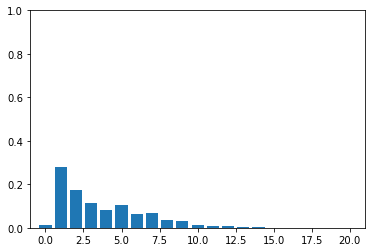

3.0


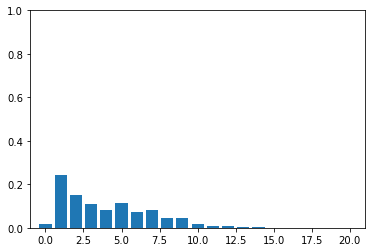

4.0


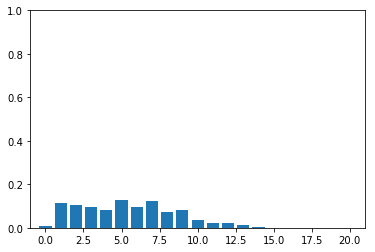

5.0


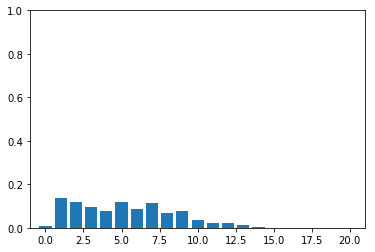

6.0


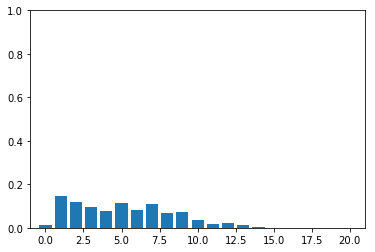

7.0


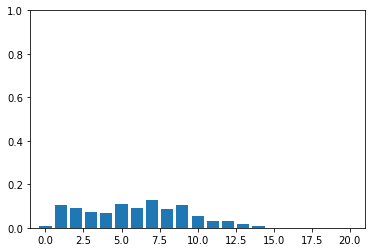

8.0


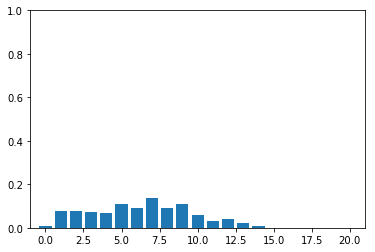

9.0


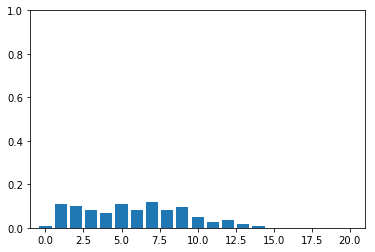

10.0


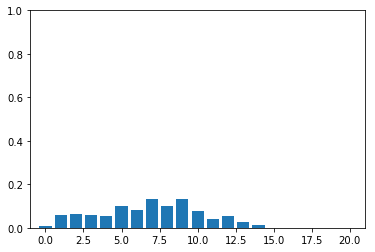

In [410]:
col='f_14'
s=train[col]*1e7
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>10]=10
# s[s<8]=8
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    
    plt.show()

[-1.0, 0.0, 1.0, 2.0, 3.0]
-1.0


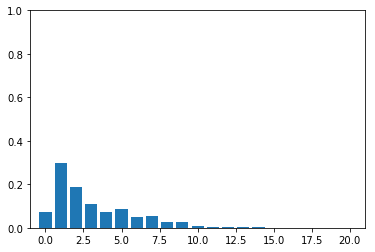

0.0


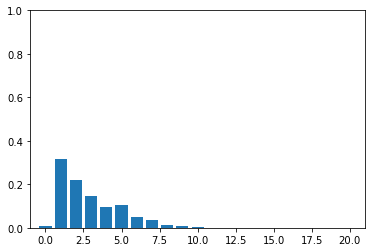

1.0


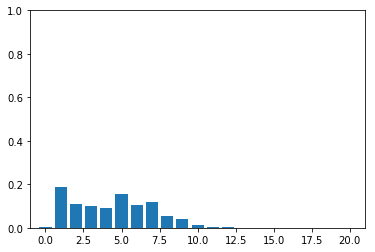

2.0


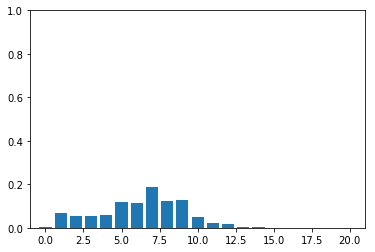

3.0


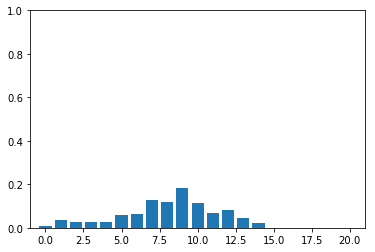

In [409]:
col='f_15'
s=train[col]*1e5
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>3]=3
# s[s<8]=8
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[9.0, 10.0, 11.0, 12.0, 13.0]
9.0


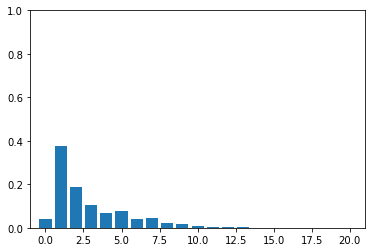

10.0


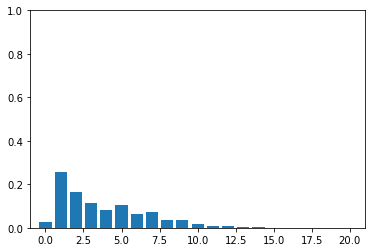

11.0


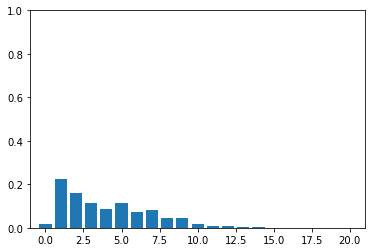

12.0


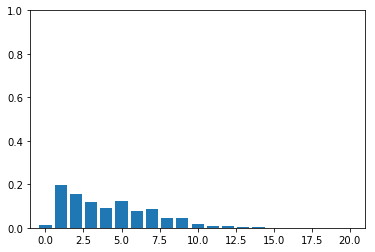

13.0


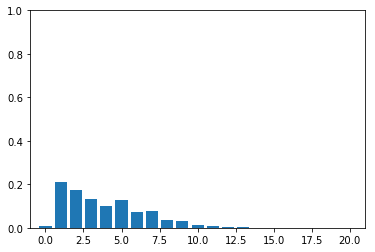

In [408]:
col='f_20'
s=train[col]*1e6
s=s-s.min()
#s[s==0]=-1
s=np.round(s,0)
s[s>13]=13
s[s<9]=9
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    
    plt.show()

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
0.0


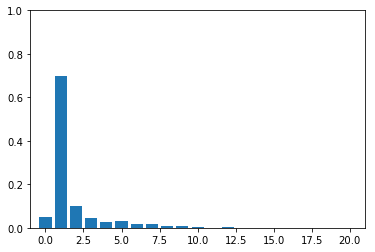

1.0


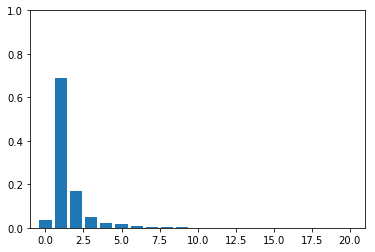

2.0


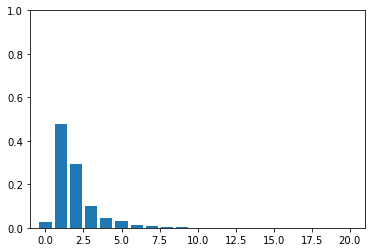

3.0


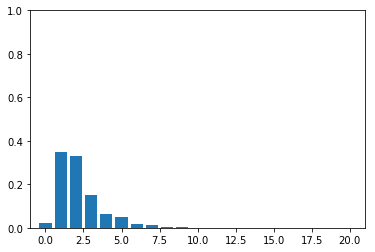

4.0


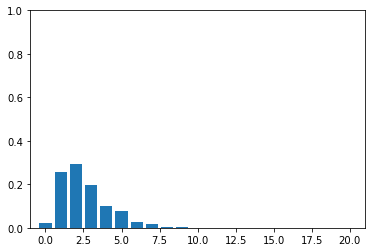

5.0


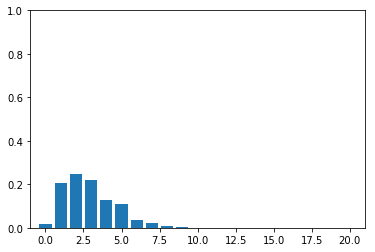

6.0


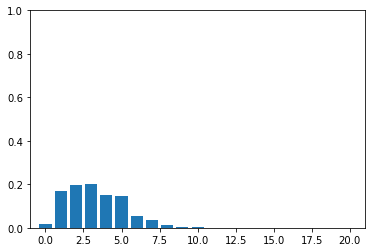

7.0


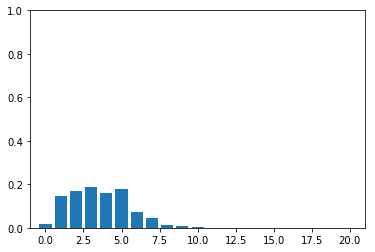

8.0


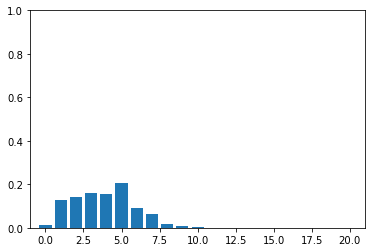

9.0


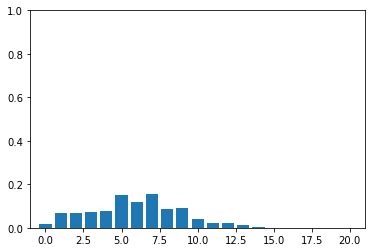

In [407]:
col='f_27'
s=train[col]*1e6
s=s-s.min()
#s[s==0]=-1
s=np.round(s,0)
s[s>9]=9
# s[s<9]=9
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
11.0


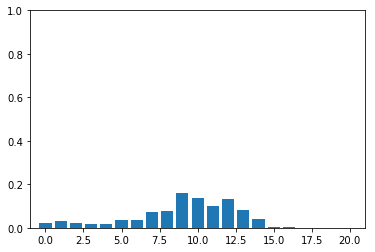

12.0


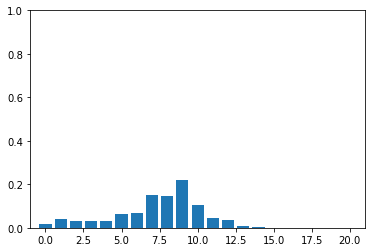

13.0


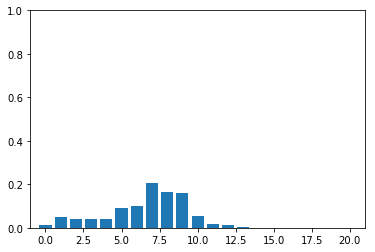

14.0


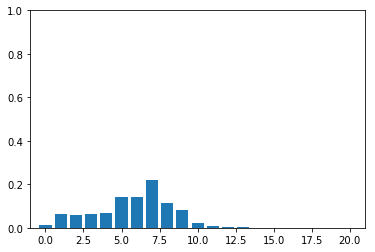

15.0


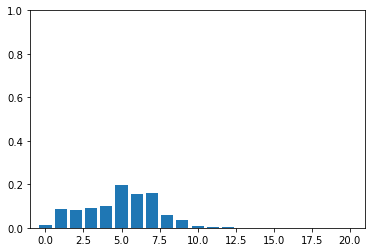

16.0


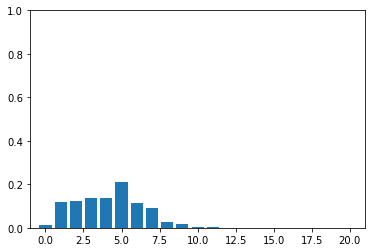

17.0


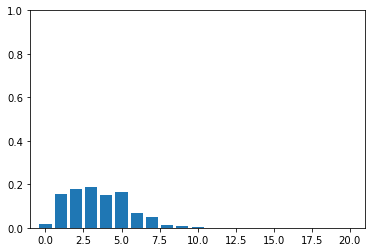

18.0


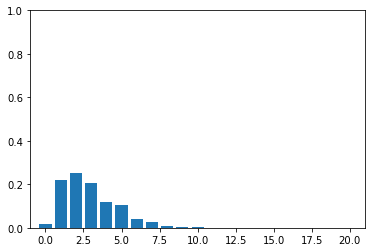

19.0


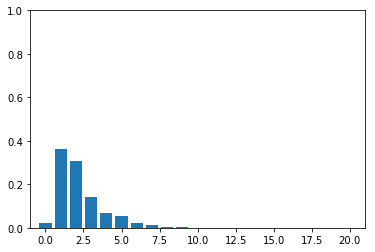

20.0


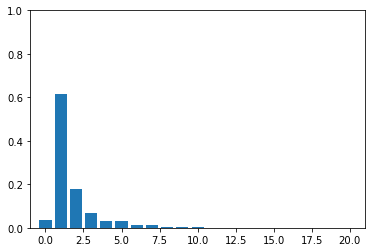

In [406]:
col='f_28'
s=train[col]*1e0
s=s-s.min()
#s[s==0]=-1
s=np.round(s,0)
#s[s>9]=9
s[s<11]=11
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-1.0, 0.0, 1.0, 2.0]
-1.0


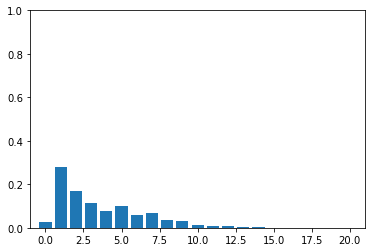

0.0


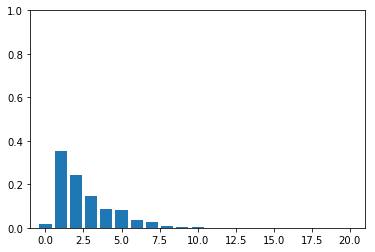

1.0


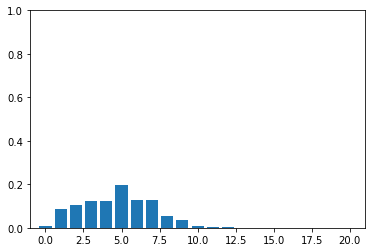

2.0


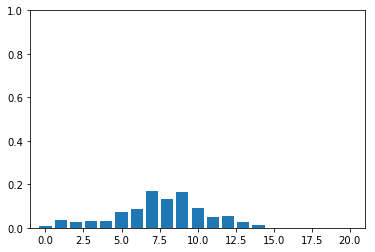

In [341]:
col='f_29'
s=train[col]*1e5
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>2]=2
#s[s<11]=11
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    plt.show()

[-1.0, 0.0, 1.0, 2.0]
-1.0


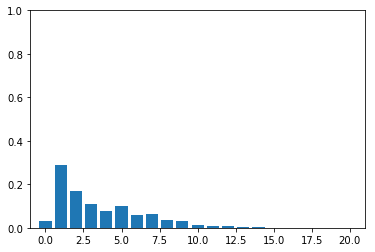

0.0


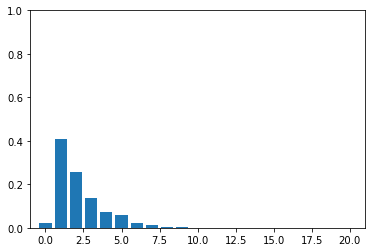

1.0


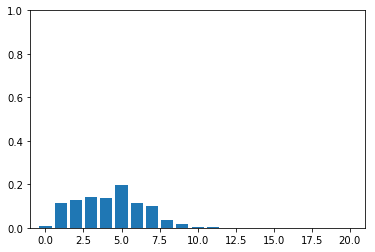

2.0


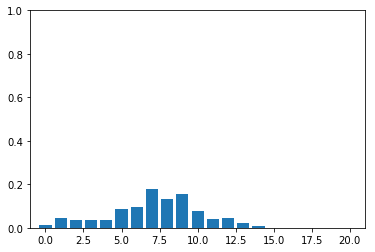

In [344]:
col='f_30'
s=train[col]*1e5
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>2]=2
#s[s<11]=11
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    plt.show()

[-1.0, 0.0, 1.0, 2.0]
-1.0


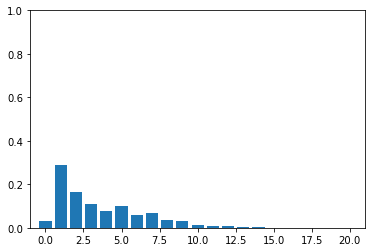

0.0


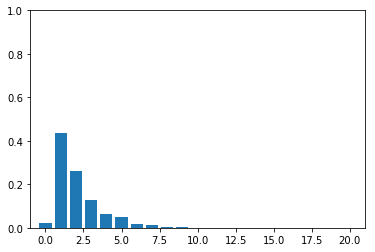

1.0


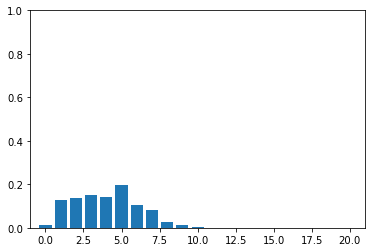

2.0


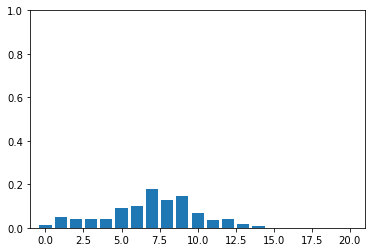

In [347]:
col='f_31'
s=train[col]*1e5
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>2]=2
#s[s<11]=11
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    plt.show()

[-1.0, 0.0, 1.0, 2.0]
-1.0


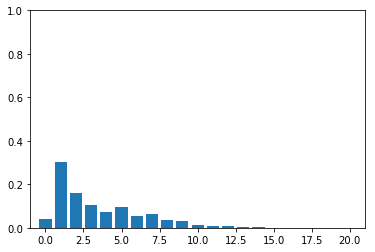

0.0


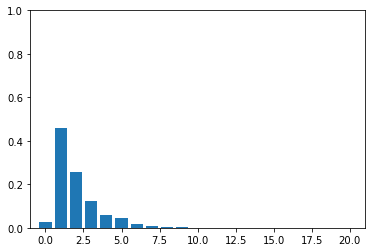

1.0


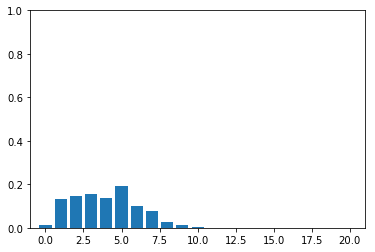

2.0


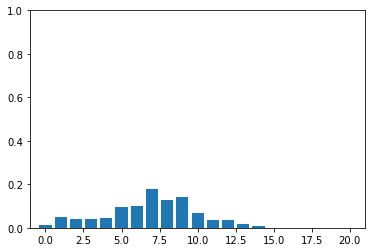

In [350]:
col='f_32'
s=train[col]*1e5
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>2]=2
#s[s<11]=11
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    plt.show()

[-1.0, 2.0]
-1.0


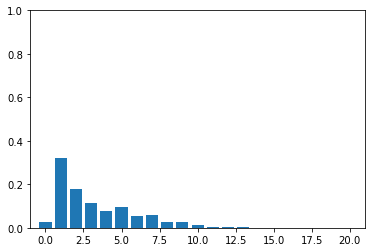

KeyboardInterrupt: 

In [359]:
col='f_33'
s=train[col]*1e5
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>2]=2
#s[s<11]=11
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    plt.show()

[-1.0, 0.0, 1.0]
-1.0


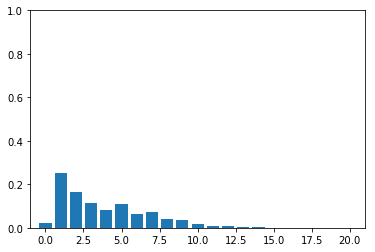

0.0


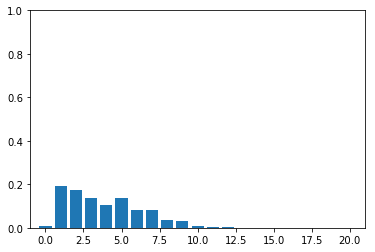

1.0


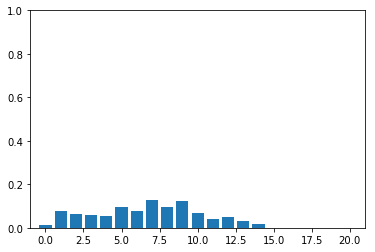

In [368]:
col='f_34'
s=train[col]*1e5
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>1]=1
#s[s<11]=11
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    plt.show()

[-1.0, 0.0, 1.0]
-1.0


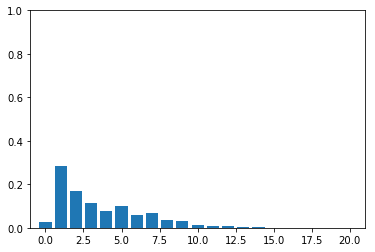

0.0


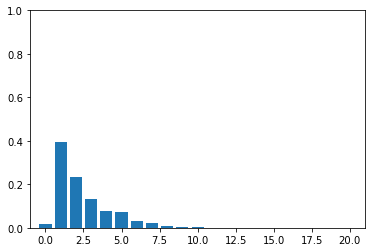

1.0


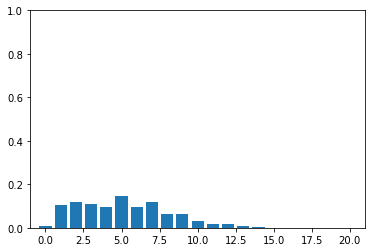

In [373]:
col='f_35'
s=train[col]*1e5
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>1]=1
#s[s<11]=11
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    plt.show()

[-1.0, 0.0, 1.0]
-1.0


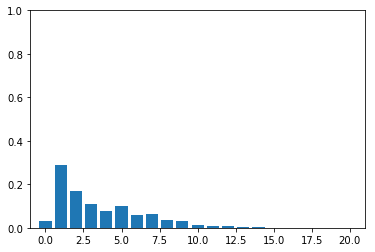

0.0


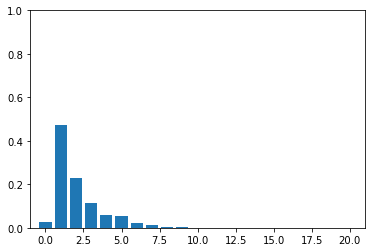

1.0


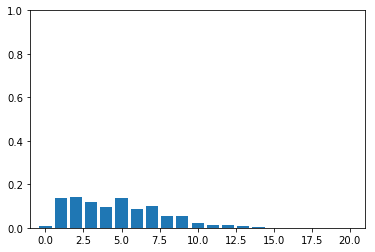

In [377]:
col='f_36'
s=train[col]*1e5
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>1]=1
#s[s<11]=11
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    plt.show()

[-1.0, 0.0, 1.0, 2.0, 3.0]
-1.0


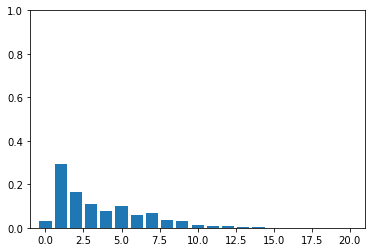

0.0


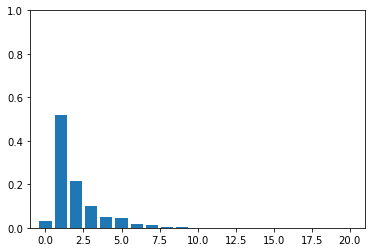

1.0


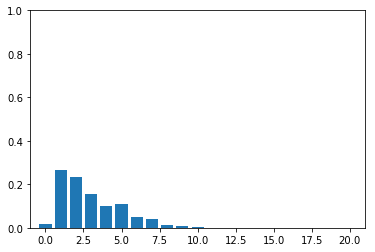

2.0


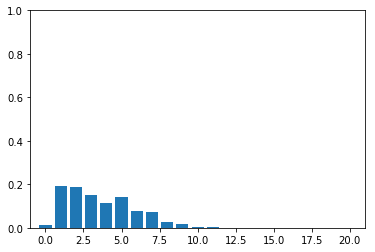

3.0


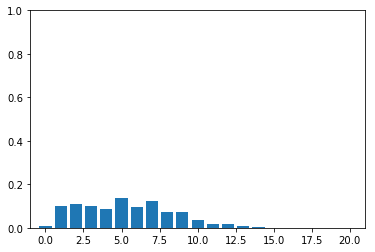

In [389]:
col='f_37'
s=train[col]*1e5
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>3]=3
#s[s<11]=11
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    plt.show()

[-1.0, 0.0, 1.0, 2.0, 3.0]
-1.0


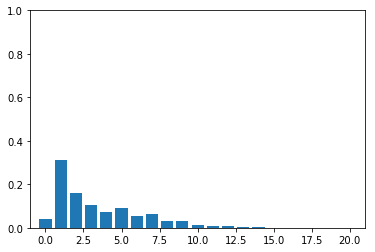

0.0


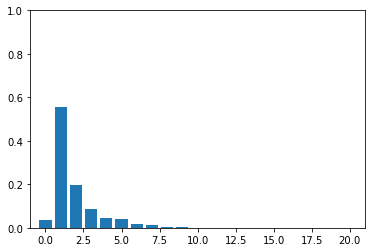

1.0


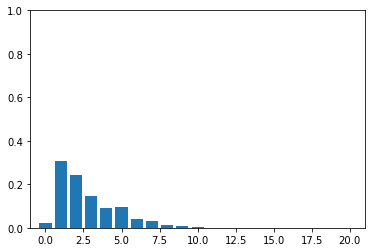

2.0


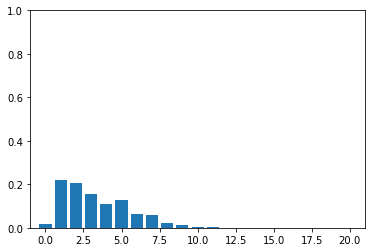

3.0


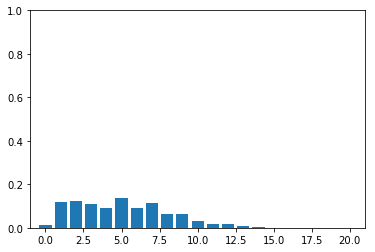

In [395]:
col='f_38'
s=train[col]*1e5
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>3]=3
#s[s<11]=11
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    plt.show()

[-1.0, 0.0, 1.0]
-1.0


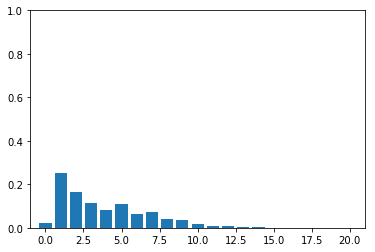

0.0


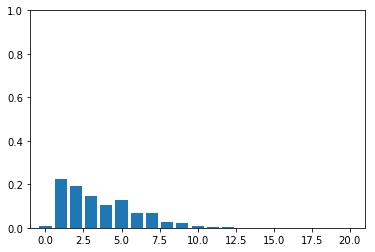

1.0


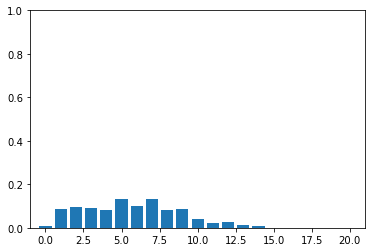

In [403]:
col='f_39'
s=train[col]*1e5
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>1]=1
#s[s<11]=11
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    plt.show()

In [400]:
col='f_39'
s=train[col]*1e5
s=s-s.min()
s[s==0]=-1
s=np.round(s,0)
s[s>1]=1
#s[s<11]=11

In [402]:
s.value_counts().sort_index()

-1.0    21577252
 0.0      226696
 1.0      134201
Name: f_39, dtype: int64

In [457]:
def isnum(s):
    try:
        val = int(float(s))
        return True
    except ValueError:
        return False

In [458]:
f41=train['f_41']

In [459]:
f41_isnum=f41.map(isnum)

In [460]:
usf41=f41[f41_isnum].map(lambda u: int(float(u)))

In [461]:
candf41=f41[~f41_isnum]

In [462]:
usf41.shape,candf41.shape

((21416279,), (521870,))

[False, True]
False


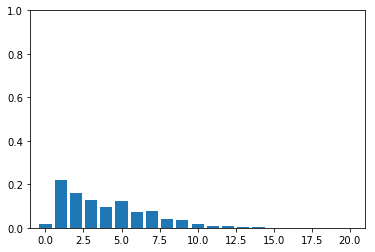

True


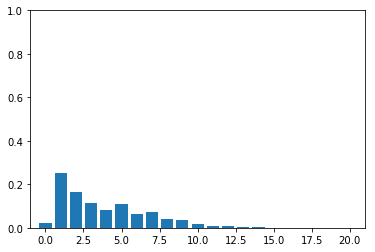

In [445]:
s=f41_isnum
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    plt.show()

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
0.0


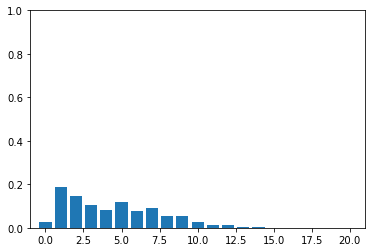

1.0


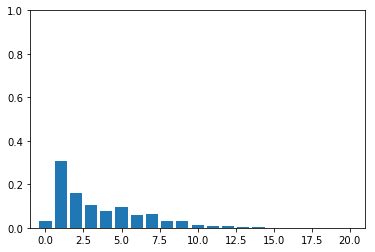

2.0


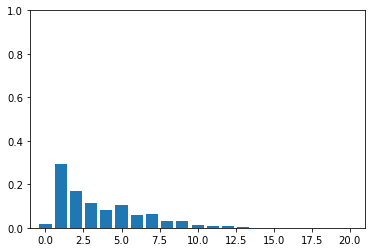

3.0


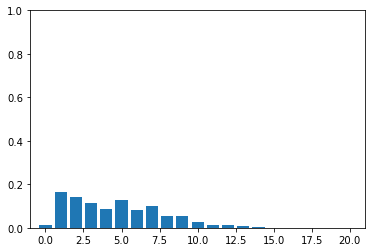

4.0


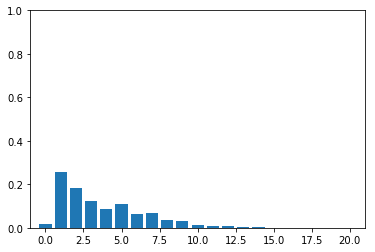

5.0


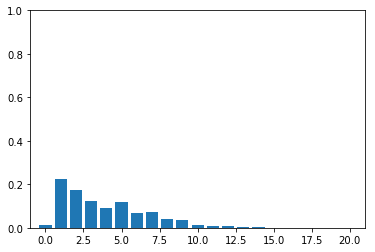

6.0


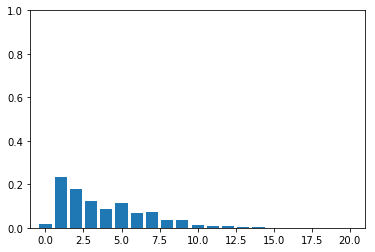

7.0


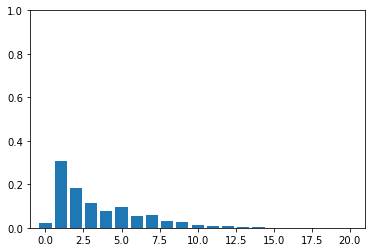

8.0


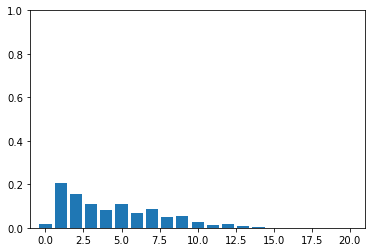

9.0


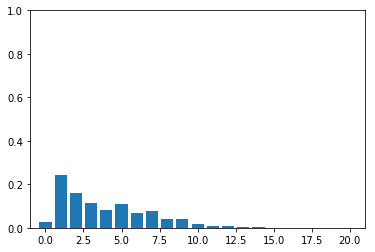

10.0


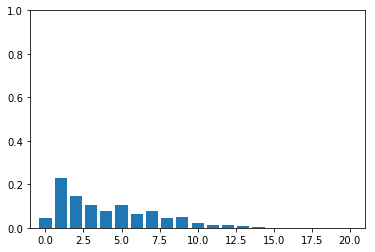

In [464]:
s=np.round(usf41/100)
markets=sorted(list(set(s)))
print markets  
for market in markets:
    df=train[f41_isnum][s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    plt.show()

In [465]:
s.value_counts().sort_index()

0.0       84544
1.0     3111809
2.0     2679338
3.0     2584344
4.0     3598326
5.0     1466540
6.0     1973215
7.0     1778857
8.0     1048222
9.0     2658341
10.0     432743
Name: f_41, dtype: int64

In [466]:
s=candf41.map(lambda u: u[0])

In [467]:
s.value_counts().sort_index()

4         2
A       365
B       464
C       112
E       312
G       386
H      2818
I        16
J      2525
K      6841
L     62978
M     20316
N    349245
P      4782
R      6777
S      3965
T     24014
V     15533
W         8
X        97
Y       217
n     20096
t         1
Name: f_41, dtype: int64

['L', 'M', 'N', 'T', 'V', 'n']
L


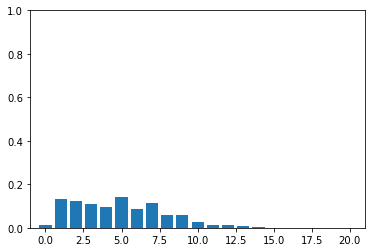

M


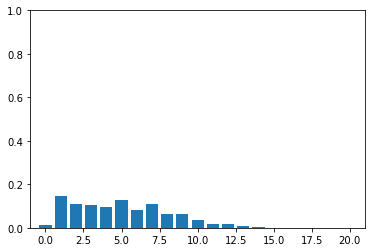

N


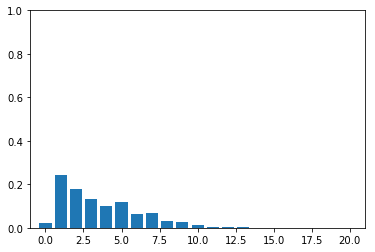

T


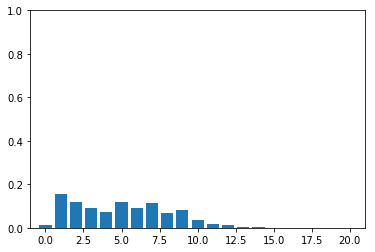

V


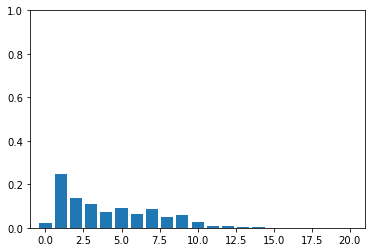

n


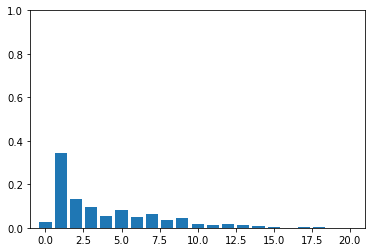

In [470]:
vc=s.value_counts()
markets=sorted(list(vc[vc>10000].index))
print markets  
for market in markets:
    df=train[~f41_isnum][s==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])
    plt.show()